## TELECOM CHURN PREDICTION

### Business Problem

In the telecom industry, customer retention has now become even more important than customer acquisition. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. We will be analysing customer-level data by building a predictive model to identify customers at high risk of churn and identify the main indicators of churn.

The predictive model will serve two purposes:

- It will be used to predict whether a high-value customer will churn or not, in near future (i.e. churn phase). By knowing this, the company can take action steps such as providing special plans, discounts on recharge etc.
- It will be used to identify important variables that are strong predictors of churn. These variables may also indicate why customers choose to switch to other networks.

#### Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#To display the rows and columns without getting truncated
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1) # this is to view complete text data in the column rather truncated

## Data Understanding and Exploration

In [2]:
import os

#path = r'D:\Data science\Course3\c3m6 case study'
path = r'C:\Users\deept\DEEPTHI\MSc in DS IIITB\PGD- Data Science Classes\Course3- Machine Learning II\Module11 - Telecom Churn Case Study'
os.chdir(path)
teleChurn_data = pd.read_csv('telecom_churn_data.csv',encoding = 'cp1252', index_col= False)
teleChurn_data.head(10)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,

In [3]:
#Reading the Data Dictionary file
data_dict = pd.read_excel('Data+Dictionary-+Telecom+Churn+Case+Study.xlsx')
data_dict

,Acronyms,Descriptions
0,MOBILE_NUMBER,Customer phone number
1,CIRCLE_ID,Telecom circle area to which the customer belongs to
2,LOC,Local calls - within same telecom circle
3,STD,STD calls - outside the calling circle
4,IC,Incoming calls
5,OG,Outgoing calls
6,T2T,"Operator T to T, i.e. within same operator (mobile to mobile)"
7,T2M,Operator T to other operator mobile
8,T2O,Operator T to other operator fixed line
9,T2F,Operator T to fixed lines of T


In [4]:
# Shape of the telecom data

teleChurn_data.shape

(99999, 226)

In [5]:
# Data types of the Data

teleChurn_data.info(verbose =True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
mobile_number               int64
circle_id                   int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6        object
last_date_of_month_7        object
last_date_of_month_8        object
last_date_of_month_9        object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float6

## Data Cleaning

### Handling Missing Values

In [6]:
# percentage of missing values in each column
round(teleChurn_data.isnull().sum()/len(teleChurn_data.index), 2)*100

mobile_number               0.0 
circle_id                   0.0 
loc_og_t2o_mou              1.0 
std_og_t2o_mou              1.0 
loc_ic_t2o_mou              1.0 
last_date_of_month_6        0.0 
last_date_of_month_7        1.0 
last_date_of_month_8        1.0 
last_date_of_month_9        2.0 
arpu_6                      0.0 
arpu_7                      0.0 
arpu_8                      0.0 
arpu_9                      0.0 
onnet_mou_6                 4.0 
onnet_mou_7                 4.0 
onnet_mou_8                 5.0 
onnet_mou_9                 8.0 
offnet_mou_6                4.0 
offnet_mou_7                4.0 
offnet_mou_8                5.0 
offnet_mou_9                8.0 
roam_ic_mou_6               4.0 
roam_ic_mou_7               4.0 
roam_ic_mou_8               5.0 
roam_ic_mou_9               8.0 
roam_og_mou_6               4.0 
roam_og_mou_7               4.0 
roam_og_mou_8               5.0 
roam_og_mou_9               8.0 
loc_og_t2t_mou_6            4.0 
loc_og_t2t

In [7]:
# Statistics of the data
teleChurn_data.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

- <span style="color:blue">It is observed that some recharge columns have minimum value of 1 while some don't (As per the Statistical representation of the data as seen above)</span>

In [8]:
# It is also observed that the recharge date and the recharge value are missing together which means the customer didn't recharge
teleChurn_data.loc[teleChurn_data.total_rech_data_6.isnull() & teleChurn_data.date_of_last_rech_data_6.isnull() & teleChurn_data.total_rech_data_7.isnull() & teleChurn_data.date_of_last_rech_data_7.isnull() & teleChurn_data.total_rech_data_8.isnull() & teleChurn_data.date_of_last_rech_data_8.isnull(),["total_rech_data_6", "date_of_last_rech_data_6","total_rech_data_7", "date_of_last_rech_data_7","total_rech_data_8", "date_of_last_rech_data_8"]].head(10)

,total_rech_data_6,date_of_last_rech_data_6,total_rech_data_7,date_of_last_rech_data_7,total_rech_data_8,date_of_last_rech_data_8
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN
12,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN
15,NaN,NaN,NaN,NaN,NaN,NaN
16,NaN,NaN,NaN,NaN,NaN,NaN
17,NaN,NaN,NaN,NaN,NaN,NaN


- <span style="color:blue">Imputing missing values with zeroes where the recharge variables have 1 as minumum value beacuse it means that the customer didn't recharge their number for that month.</span>

In [9]:
#Imputing all the recharge columns missing values with 0 as most of them have 1 as minimum values
rech_cols = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 
             'av_rech_amt_data_8', 'av_rech_amt_data_9', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9']

teleChurn_data[rech_cols] = teleChurn_data[rech_cols].apply(lambda x: x.fillna(0))

In [10]:
# Dropping mobile number and Circle_ID column as they are not an important feature in further analysis
teleChurn_data = teleChurn_data.drop(['mobile_number', 'circle_id'], axis=1)

In [11]:
# There are few more columns (Date Columns) that are not relavent for current analysis like the date columns. Storing all the date columns and then dropping them
date_cols = ['last_date_of_month_6', 'last_date_of_month_7','last_date_of_month_8','last_date_of_month_9','date_of_last_rech_6', 'date_of_last_rech_7', 
             'date_of_last_rech_8', 'date_of_last_rech_9', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'date_of_last_rech_data_9']

teleChurn_data = teleChurn_data.drop(date_cols, axis=1)

In [12]:
teleChurn_data.shape

(99999, 212)

In [13]:
# Rechecking for missing values in each column
round(teleChurn_data.isnull().sum()/len(teleChurn_data.index), 2)*100

loc_og_t2o_mou        1.0 
std_og_t2o_mou        1.0 
loc_ic_t2o_mou        1.0 
arpu_6                0.0 
arpu_7                0.0 
arpu_8                0.0 
arpu_9                0.0 
onnet_mou_6           4.0 
onnet_mou_7           4.0 
onnet_mou_8           5.0 
onnet_mou_9           8.0 
offnet_mou_6          4.0 
offnet_mou_7          4.0 
offnet_mou_8          5.0 
offnet_mou_9          8.0 
roam_ic_mou_6         4.0 
roam_ic_mou_7         4.0 
roam_ic_mou_8         5.0 
roam_ic_mou_9         8.0 
roam_og_mou_6         4.0 
roam_og_mou_7         4.0 
roam_og_mou_8         5.0 
roam_og_mou_9         8.0 
loc_og_t2t_mou_6      4.0 
loc_og_t2t_mou_7      4.0 
loc_og_t2t_mou_8      5.0 
loc_og_t2t_mou_9      8.0 
loc_og_t2m_mou_6      4.0 
loc_og_t2m_mou_7      4.0 
loc_og_t2m_mou_8      5.0 
loc_og_t2m_mou_9      8.0 
loc_og_t2f_mou_6      4.0 
loc_og_t2f_mou_7      4.0 
loc_og_t2f_mou_8      5.0 
loc_og_t2f_mou_9      8.0 
loc_og_t2c_mou_6      4.0 
loc_og_t2c_mou_7      4.0 
l

### Replacing NA values in Categorical Variables
- <span style="color:blue">There are couple of columns like the NIGHT Package and Facebook users column that are schemes used by the customers.</span>
- These columns have Nan values and they are useful for our further analysis.
- Replacing the missing values with -1, creating a new category

In [14]:
cat_cols =  ['night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9','fb_user_6','fb_user_7','fb_user_8','fb_user_9']
teleChurn_data[cat_cols] = teleChurn_data[cat_cols].apply(lambda x: x.fillna(-1))

In [15]:
# Rechecking for missing values in each column
round(teleChurn_data.isnull().sum()/len(teleChurn_data.index), 2)*100

loc_og_t2o_mou        1.0 
std_og_t2o_mou        1.0 
loc_ic_t2o_mou        1.0 
arpu_6                0.0 
arpu_7                0.0 
arpu_8                0.0 
arpu_9                0.0 
onnet_mou_6           4.0 
onnet_mou_7           4.0 
onnet_mou_8           5.0 
onnet_mou_9           8.0 
offnet_mou_6          4.0 
offnet_mou_7          4.0 
offnet_mou_8          5.0 
offnet_mou_9          8.0 
roam_ic_mou_6         4.0 
roam_ic_mou_7         4.0 
roam_ic_mou_8         5.0 
roam_ic_mou_9         8.0 
roam_og_mou_6         4.0 
roam_og_mou_7         4.0 
roam_og_mou_8         5.0 
roam_og_mou_9         8.0 
loc_og_t2t_mou_6      4.0 
loc_og_t2t_mou_7      4.0 
loc_og_t2t_mou_8      5.0 
loc_og_t2t_mou_9      8.0 
loc_og_t2m_mou_6      4.0 
loc_og_t2m_mou_7      4.0 
loc_og_t2m_mou_8      5.0 
loc_og_t2m_mou_9      8.0 
loc_og_t2f_mou_6      4.0 
loc_og_t2f_mou_7      4.0 
loc_og_t2f_mou_8      5.0 
loc_og_t2f_mou_9      8.0 
loc_og_t2c_mou_6      4.0 
loc_og_t2c_mou_7      4.0 
l

### Dropping Columns with more than 60% Missing Values

In [16]:
# Checking the columns having more than 60% missing values
missing_columns = teleChurn_data.columns[100*(teleChurn_data.isnull().sum()/len(teleChurn_data.index)) > 60]
print(missing_columns)

Index(['count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
       'count_rech_2g_9', 'count_rech_3g_6', 'count_rech_3g_7',
       'count_rech_3g_8', 'count_rech_3g_9', 'arpu_3g_6', 'arpu_3g_7',
       'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8',
       'arpu_2g_9'],
      dtype='object')


In [17]:
#Dropping the missing columns (16 columns)
teleChurn_data = teleChurn_data.drop(missing_columns, axis=1)
print(teleChurn_data.shape)

(99999, 196)


### Imputing values less than 60% missing values - Simple Imputer

In [18]:
#List of columns that needs to be imputed
imputer_col = teleChurn_data.columns[(100*(teleChurn_data.isnull().sum()/len(teleChurn_data.index)) < 60) & (100*(teleChurn_data.isnull().sum()/len(teleChurn_data.index)) > 0)]
print("length: ", len(imputer_col))
#print(imputer_col)
for x in range(len(imputer_col)): 
    print(imputer_col[x])

length:  119
loc_og_t2o_mou
std_og_t2o_mou
loc_ic_t2o_mou
onnet_mou_6
onnet_mou_7
onnet_mou_8
onnet_mou_9
offnet_mou_6
offnet_mou_7
offnet_mou_8
offnet_mou_9
roam_ic_mou_6
roam_ic_mou_7
roam_ic_mou_8
roam_ic_mou_9
roam_og_mou_6
roam_og_mou_7
roam_og_mou_8
roam_og_mou_9
loc_og_t2t_mou_6
loc_og_t2t_mou_7
loc_og_t2t_mou_8
loc_og_t2t_mou_9
loc_og_t2m_mou_6
loc_og_t2m_mou_7
loc_og_t2m_mou_8
loc_og_t2m_mou_9
loc_og_t2f_mou_6
loc_og_t2f_mou_7
loc_og_t2f_mou_8
loc_og_t2f_mou_9
loc_og_t2c_mou_6
loc_og_t2c_mou_7
loc_og_t2c_mou_8
loc_og_t2c_mou_9
loc_og_mou_6
loc_og_mou_7
loc_og_mou_8
loc_og_mou_9
std_og_t2t_mou_6
std_og_t2t_mou_7
std_og_t2t_mou_8
std_og_t2t_mou_9
std_og_t2m_mou_6
std_og_t2m_mou_7
std_og_t2m_mou_8
std_og_t2m_mou_9
std_og_t2f_mou_6
std_og_t2f_mou_7
std_og_t2f_mou_8
std_og_t2f_mou_9
std_og_t2c_mou_6
std_og_t2c_mou_7
std_og_t2c_mou_8
std_og_t2c_mou_9
std_og_mou_6
std_og_mou_7
std_og_mou_8
std_og_mou_9
isd_og_mou_6
isd_og_mou_7
isd_og_mou_8
isd_og_mou_9
spl_og_mou_6
spl_og_mou_7
spl_

In [19]:
# make copy to avoid changing original data (when Imputing)
churn_data = teleChurn_data.copy()
churn_data_col = churn_data.columns

In [20]:
#Library to impute the missing values
from sklearn.impute import SimpleImputer 

In [21]:
# Create an imputer object that looks for 'Nan' values, 
# then replaces them with the mean value of the feature by columns (axis=0)
mean_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# Train the imputor on the churn_data dataset
mean_imputer = mean_imputer.fit(churn_data)
# Apply the imputer to the churn_data dataset
imputed_df = mean_imputer.transform(churn_data.values)

print(imputed_df)

[[   0.      0.      0.   ...    0.    101.2     3.58]
 [   0.      0.      0.   ...    0.      0.      0.  ]
 [   0.      0.      0.   ...    0.      4.17    0.  ]
 ...
 [   0.      0.      0.   ...    0.      0.      0.  ]
 [   0.      0.      0.   ... 1151.03 1173.18    0.  ]
 [   0.      0.      0.   ...    0.      0.      0.  ]]


In [22]:
type(imputed_df)

numpy.ndarray

In [23]:
# converting imputed numpy array to pandas dataframe
churn_data = pd.DataFrame(imputed_df, columns=churn_data_col)
print(churn_data.isnull().sum()*100/churn_data.shape[0])


loc_og_t2o_mou        0.0
std_og_t2o_mou        0.0
loc_ic_t2o_mou        0.0
arpu_6                0.0
arpu_7                0.0
arpu_8                0.0
arpu_9                0.0
onnet_mou_6           0.0
onnet_mou_7           0.0
onnet_mou_8           0.0
onnet_mou_9           0.0
offnet_mou_6          0.0
offnet_mou_7          0.0
offnet_mou_8          0.0
offnet_mou_9          0.0
roam_ic_mou_6         0.0
roam_ic_mou_7         0.0
roam_ic_mou_8         0.0
roam_ic_mou_9         0.0
roam_og_mou_6         0.0
roam_og_mou_7         0.0
roam_og_mou_8         0.0
roam_og_mou_9         0.0
loc_og_t2t_mou_6      0.0
loc_og_t2t_mou_7      0.0
loc_og_t2t_mou_8      0.0
loc_og_t2t_mou_9      0.0
loc_og_t2m_mou_6      0.0
loc_og_t2m_mou_7      0.0
loc_og_t2m_mou_8      0.0
loc_og_t2m_mou_9      0.0
loc_og_t2f_mou_6      0.0
loc_og_t2f_mou_7      0.0
loc_og_t2f_mou_8      0.0
loc_og_t2f_mou_9      0.0
loc_og_t2c_mou_6      0.0
loc_og_t2c_mou_7      0.0
loc_og_t2c_mou_8      0.0
loc_og_t2c_m

In [24]:
churn_data.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,0.0,0.0,0.0,197.385,214.816,213.803,21.100,132.395875,133.670805,0.00,130.302327,197.935577,197.045133,0.00,190.337222,9.950013,7.149898,0.00,6.343841,13.911337,9.818732,0.00,8.555519,47.100763,46.47301,0.00,44.584446,93.342088,91.397131,0.00,90.463192,3.751013,3.792985,0.00,3.655123,1.123056,1.3685,0.00,1.232726,144.201175,141.670476,0.00,138.70997,79.82987,83.299598,0.00,82.342919,87.299624,90.804137,0.00,86.276622,1.129011,1.11501,0.00,1.042362,0.0,0.0,0.0,0.0,168.261218,175.221436,0.00,169.664466,0.798277,0.776572,0.0,0.723892,3.916811,4.978279,0.00,4.412767,0.454157,0.030235,0.0,0.047456,0.00,0.00,0.00,0.00,47.922365,47.99052,0.16,46.281794,107.47565,107.120493,4.13,106.155471,12.084305,12.599697,1.15,12.173105,167.491059,167.71954,5.44,164.619293,9.575993,10.011904,0.00,9.432479,20.72224,21.656415,0.00,19.620913,2.156397,2.216923,0.00,2.173419,0.0,0.0,0.0,0.0,32.457179,33.887833,0.00,31.229344,0.00,0.00,5.44,0.00,0.061557,0.033585,0.0,0.163137,7.460608,8.334936,0.0,8.063003,0.854656,1.01296,0.0,1.017162,4.0,3.0,2.0,6.0,362.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,1.0,1.0,1.0,0.0,2

### Checking for Outliers in the data

In [25]:
churn_data.describe()


,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,99999.0,99999.0,99999.0,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.00000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.0,99999.0,99999.0,99999.0,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000

In [30]:
#num_col = churn_data.select_dtypes(exclude = ['object']).columns
num_col =['arpu_6','arpu_7','arpu_8','arpu_9','onnet_mou_6','onnet_mou_7','onnet_mou_8','onnet_mou_9','offnet_mou_6','offnet_mou_7','offnet_mou_8','offnet_mou_9',
         'std_og_mou_6','std_og_mou_7','std_og_mou_8','std_og_mou_9','total_og_mou_6','total_og_mou_7','total_og_mou_8','total_og_mou_9',
         'total_ic_mou_6','total_ic_mou_7','total_ic_mou_8','total_ic_mou_9','total_rech_amt_6','total_rech_amt_7','total_rech_amt_8','total_rech_amt_9',
         'max_rech_amt_6','max_rech_amt_7','max_rech_amt_8','max_rech_amt_9','aon']

### Capping the outlier - InterQuartile Method

In [31]:
# We will cap these outliers
for i in num_col:
    Q = churn_data[i].quantile([0.10,0.90]).values
    churn_data[i][churn_data[i] <= Q[0]] = Q[0]
    churn_data[i][churn_data[i] >= Q[1]] = Q[1]
churn_data.shape

(99999, 196)

In [32]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
churn_data[num_col].describe(percentiles=[.25,.5,.75,.90,.95,.99])

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,aon
count,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,250.208379,245.057921,244.008165,226.423312,87.090972,86.399882,86.208704,84.234609,155.176907,153.048138,153.707365,147.715340,111.593110,116.454655,115.445012,112.156226,243.964536,247.516530,241.974894,228.159267,162.828619,164.511189,161.539625,152.526445,285.026710,279.466615,280.827198,260.326903,89.529015,88.969380,94.127961,87.910289,1185.733797
std,189.313168,189.600229,192.833547,194.243392,106.326687,107.720388,105.165988,101.410508,146.436801,148.238861,147.213224,140.609672,168.258054,177.152009,173.075200,164.903490,253.234316,261.680281,258.573475,251.974350,150.539321,150.750306,149.760796,145.364195,231.393394,232.015809,235.637476,232.914742,62.949531,64.093629,72.185690,72.201371,866.405034
min,31.647968,29.355992,18.054968,0.090000,0.350000,0.230000,0.210000,0.000000,7.910000,7.040000,6.540000,4.330000,0.000000,0.000000,0.000000,0.000000,0.000000,0.210000,0.000000,0.000000,2.080000,3.190000,0.810000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,286.000000
25%,93.411500,86.980500,84.126000,62.685000,8.030000,7.290000,7.410000,6.630000,36.720000,33.960000,34.510000,31.230000,0.000000,0.000000,0.000000,0.000000,44.740000,43.010000,38.580000,25.510000,38.530000,41.190000,38.290000,32.370000,109.000000,100.000000,90.000000,52.000000,30.000000,30.000000,30.000000,28.000000,467.000000
50%,197.704000,191.640000,192.080000,176.849000,37.960000,35.810000,37.160000,37.140000,103.410000,98.530000,101.960000,101.290000,14.840000,14.080000,14.650000,14.280000,145.140000,141.530000,138.610000,125.460000,114.740000,116.340000,114.660000,105.890000,230.000000,220.000000,225.000000,200.000000,110.000000,110.000000,98.000000,61.000000,863.000000
75%,371.060000,365.344500,369.370500,353.466500,132.395875,133.670805,133.018098,130.302327,222.535000,217.830000,215.500000,202.830000,168.261218,175.221436,174.191498,169.664466,372.860000,378.570000,369.900000,353.480000,251.670000,250.660000,248.990000,236.320000,437.500000,428.000000,434.500000,415.000000,120.000000,128.000000,144.000000,144.000000,1807.500000
90%,620.075003,617.249024,618.158019,601.535016,330.580080,334.480128,326.980096,315.680080,464.290112,468.790000,466.540000,444.860000,504.640400,530.630480,519.760160,496.140560,779.030240,804.490160,791.490160,764.560240,467.980080,471.890400,465.940160,448.510000,732.000000,731.000000,736.000000,709.000000,202.000000,200.000000,225.000000,215.000000,2799.040000
95%,620.075016,617.249120,618.158096,601.535080,330.580400,334.480640,326.980480,315.680400,464.290560,468.790000,466.540000,444.860000,504.642000,530.632400,519.760800,496.142800,779.031200,804.490800,791.490800,764.561200,467.980400,471.892000,465.940800,448.510000,732.000000,731.000000,736.000000,709.000000,202.000000,200.000000,225.000000,215.000000,2799.200000
99%,620.075016,617.249120,618.158096,601.535080,330.580400,334.480640,326.980480,315.680400,464.290560,468.790000,466.540000,444.860000,504.642000,530.632400,519.760800,496.142800,779.031200,804.490800,791.490800,764.561200,467.980400,471.892000,465.940800,448.510000,732.000000,731.000000,736.000000,709.000000,2

## Filtering High Value Customer
- As per the Telecom company approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce churn of the high-value customers, we will be able to save the comapny

### Total data recharge amount

In [33]:
# calculating the total data recharge amount for 6 and 7 months = number of recharges * average recharge amount
churn_data['total_data_rech_6'] = churn_data.total_rech_data_6 * churn_data.av_rech_amt_data_6
churn_data['total_data_rech_7'] = churn_data.total_rech_data_7 * churn_data.av_rech_amt_data_7
churn_data['total_data_rech_8'] = churn_data.total_rech_data_8 * churn_data.av_rech_amt_data_8

In [34]:
#Calculating to get total combined recharge amount for a month
churn_data['rech_amt_data_6'] = churn_data.total_rech_amt_6 + churn_data.total_data_rech_6
churn_data['rech_amt_data_7'] = churn_data.total_rech_amt_7 + churn_data.total_data_rech_7

# calculating average recharge done by customer in 6 and 7 months (Good Phase)
churn_data['avg_rech_amt_67'] = (churn_data.rech_amt_data_6 + churn_data.rech_amt_data_7)/2

In [35]:
churn_data.columns.to_list()

['loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_

In [36]:
# look at the 70th percentile recharge amount
rech_70percent = churn_data.avg_rech_amt_67.quantile(0.7)
print("Recharge amount at 70th percentile: ", rech_70percent)

Recharge amount at 70th percentile:  435.5


- We will keep the threshold at 70% rechanrge amount. We will check for the customers who have recharged their mobile more than or equal to 70% value

In [37]:
#checking for the customers at the 70% threshold and retaining them
churn_HVC = churn_data.loc[churn_data.avg_rech_amt_67 >= rech_70percent, :]
churn_HVC = churn_HVC.reset_index(drop=True)
churn_HVC.shape

(30019, 202)

In [38]:
# deleting the variables created to filter high-value customers
churn_HVC = churn_HVC.drop(['total_data_rech_6', 'total_data_rech_7','total_data_rech_8','rech_amt_data_6', 'rech_amt_data_7'], axis=1)

In [39]:
col67_list = churn_HVC.filter(regex='_6|_7').columns.str[:-2]
col67_list.unique()

Index(['arpu', 'onnet_mou', 'offnet_mou', 'roam_ic_mou', 'roam_og_mou',
       'loc_og_t2t_mou', 'loc_og_t2m_mou', 'loc_og_t2f_mou', 'loc_og_t2c_mou',
       'loc_og_mou', 'std_og_t2t_mou', 'std_og_t2m_mou', 'std_og_t2f_mou',
       'std_og_t2c_mou', 'std_og_mou', 'isd_og_mou', 'spl_og_mou', 'og_others',
       'total_og_mou', 'loc_ic_t2t_mou', 'loc_ic_t2m_mou', 'loc_ic_t2f_mou',
       'loc_ic_mou', 'std_ic_t2t_mou', 'std_ic_t2m_mou', 'std_ic_t2f_mou',
       'std_ic_t2o_mou', 'std_ic_mou', 'total_ic_mou', 'spl_ic_mou',
       'isd_ic_mou', 'ic_others', 'total_rech_num', 'total_rech_amt',
       'max_rech_amt', 'last_day_rch_amt', 'total_rech_data', 'max_rech_data',
       'av_rech_amt_data', 'vol_2g_mb', 'vol_3g_mb', 'night_pck_user',
       'monthly_2g', 'sachet_2g', 'monthly_3g', 'sachet_3g', 'fb_user',
       'avg_rech_amt_'],
      dtype='object')

In [40]:
#Creating more new features by taking average column for 6th and 7th month
for idx, col in enumerate(col67_list.unique()):
    if col !='avg_rech_amt_':
        avg_col_name = "avg_"+col+"_67" # Creating dynamic Column names (New Features)
        col_6 = col+"_6"
        col_7 = col+"_7"
        churn_HVC[avg_col_name] = (churn_HVC[col_6]  + churn_HVC[col_7])/ 2

In [41]:
churn_HVC.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_67,avg_arpu_67,avg_onnet_mou_67,avg_offnet_mou_67,avg_roam_ic_mou_67,avg_roam_og_mou_67,avg_loc_og_t2t_mou_67,avg_loc_og_t2m_mou_67,avg_loc_og_t2f_mou_67,avg_loc_og_t2c_mou_67,avg_loc_og_mou_67,avg_std_og_t2t_mou_67,avg_std_og_t2m_mou_67,avg_std_og_t2f_mou_67,avg_std_og_t2c_mou_67,avg_std_og_mou_67,avg_isd_og_mou_67,avg_spl_og_mou_67,avg_og_others_67,avg_total_og_mou_67,avg_loc_ic_t2t_mou_67,avg_loc_ic_t2m_mou_67,avg_loc_ic_t2f_mou_67,avg_loc_ic_mou_67,avg_std_ic_t2t_mou_67,avg_std_ic_t2m_mou_67,avg_std_ic_t2f_mou_67,avg_std_ic_t2o_mou_67,avg_std_ic_mou_67,avg_total_ic_mou_67,avg_spl_ic_mou_67,avg_isd_ic_mou_67,avg_ic_others_67,avg_total_rech_num_67,avg_total_rech_amt_67,avg_max_rech_amt_67,avg_last_day_rch_amt_67,avg_total_rech_data_67,avg_max_rech_data_67,avg_av_rech_amt_data_67,avg_vol_2g_mb_67,avg_vol_3g_mb_67,avg_night_pck_user_67,avg_monthly_2g_67,avg_sachet_2g_67,avg_monthly_3g_67,avg_sachet_3g_67,avg_fb_user_67
0,0.0,0.0,0.0,197.385000,214.81600,213.803000,21.100,132.395875,133.670805,0.21,130.302327,197.935577,197.045133,6.54,190.337222,9.950013,7.149898,0.000000,6.343841,13.911337,9.818

In [42]:
# deleting the variables created to filter high-value customers
col_67= churn_HVC.filter(regex='_6|_7').columns
print(col_67.tolist())

['arpu_6', 'arpu_7', 'onnet_mou_6', 'onnet_mou_7', 'offnet_mou_6', 'offnet_mou_7', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_og_mou_6', 'roam_og_mou_7', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_mou_6', 'loc_og_mou_7', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_mou_6', 'std_og_mou_7', 'isd_og_mou_6', 'isd_og_mou_7', 'spl_og_mou_6', 'spl_og_mou_7', 'og_others_6', 'og_others_7', 'total_og_mou_6', 'total_og_mou_7', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_mou_6', 'loc_ic_mou_7', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_mou_6', 'std_ic

In [43]:
#Manually took all the 6 and 7 month data to avoid average 67 columns getting deleted
col67_to_drop = ['arpu_6', 'arpu_7', 'onnet_mou_6', 'onnet_mou_7', 'offnet_mou_6', 'offnet_mou_7', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_og_mou_6', 
                  'roam_og_mou_7', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 
                  'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_mou_6', 'loc_og_mou_7', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2m_mou_6', 
                  'std_og_t2m_mou_7', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_mou_6', 'std_og_mou_7', 
                  'isd_og_mou_6', 'isd_og_mou_7', 'spl_og_mou_6', 'spl_og_mou_7', 'og_others_6', 'og_others_7', 'total_og_mou_6', 'total_og_mou_7', 'loc_ic_t2t_mou_6', 
                  'loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_mou_6', 'loc_ic_mou_7', 'std_ic_t2t_mou_6', 
                  'std_ic_t2t_mou_7', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_mou_6', 
                  'std_ic_mou_7', 'total_ic_mou_6', 'total_ic_mou_7', 'spl_ic_mou_6', 'spl_ic_mou_7', 'isd_ic_mou_6', 'isd_ic_mou_7', 'ic_others_6', 'ic_others_7', 
                  'total_rech_num_6', 'total_rech_num_7', 'total_rech_amt_6', 'total_rech_amt_7', 'max_rech_amt_6', 'max_rech_amt_7', 'last_day_rch_amt_6', 
                  'last_day_rch_amt_7', 'total_rech_data_6', 'total_rech_data_7', 'max_rech_data_6', 'max_rech_data_7', 'av_rech_amt_data_6', 
                  'av_rech_amt_data_7', 'vol_2g_mb_6', 'vol_2g_mb_7', 'vol_3g_mb_6', 'vol_3g_mb_7', 'night_pck_user_6', 'night_pck_user_7', 
                  'monthly_2g_6', 'monthly_2g_7', 'sachet_2g_6', 'sachet_2g_7', 'monthly_3g_6', 'monthly_3g_7', 'sachet_3g_6', 'sachet_3g_7', 'fb_user_6', 'fb_user_7']
churn_HVC.drop(col67_to_drop, axis=1, inplace=True)

In [44]:
churn_HVC.shape

(30019, 150)

### Unique Value columns

In [45]:
# Dropping columns with unique values
for i in churn_HVC.columns:
    if churn_HVC[i].nunique() <= 2:
        print("\nColumn",i,"has ", churn_HVC[i].nunique(),"unique value")
        print("Dropping the column",i)
        churn_HVC.drop(i,axis=1,inplace = True)

print(churn_HVC.shape)


Column loc_og_t2o_mou has  1 unique value
Dropping the column loc_og_t2o_mou

Column std_og_t2o_mou has  1 unique value
Dropping the column std_og_t2o_mou

Column loc_ic_t2o_mou has  1 unique value
Dropping the column loc_ic_t2o_mou

Column std_og_t2c_mou_8 has  1 unique value
Dropping the column std_og_t2c_mou_8

Column std_og_t2c_mou_9 has  1 unique value
Dropping the column std_og_t2c_mou_9

Column isd_og_mou_8 has  1 unique value
Dropping the column isd_og_mou_8

Column og_others_8 has  1 unique value
Dropping the column og_others_8

Column og_others_9 has  1 unique value
Dropping the column og_others_9

Column std_ic_t2o_mou_8 has  1 unique value
Dropping the column std_ic_t2o_mou_8

Column std_ic_t2o_mou_9 has  1 unique value
Dropping the column std_ic_t2o_mou_9

Column night_pck_user_8 has  2 unique value
Dropping the column night_pck_user_8

Column avg_std_og_t2c_mou_67 has  1 unique value
Dropping the column avg_std_og_t2c_mou_67

Column avg_isd_og_mou_67 has  1 unique value


## Deriving the Churn

In [46]:
churn_HVC.columns

Index(['arpu_8', 'arpu_9', 'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_8',
       'offnet_mou_9', 'roam_ic_mou_8', 'roam_ic_mou_9', 'roam_og_mou_8',
       'roam_og_mou_9',
       ...
       'avg_max_rech_data_67', 'avg_av_rech_amt_data_67', 'avg_vol_2g_mb_67',
       'avg_vol_3g_mb_67', 'avg_night_pck_user_67', 'avg_monthly_2g_67',
       'avg_sachet_2g_67', 'avg_monthly_3g_67', 'avg_sachet_3g_67',
       'avg_fb_user_67'],
      dtype='object', length=136)

In [47]:
#total minutes of calling is sum total minutes of outgoing+total minutes of incoming
churn_HVC['total_call_9'] = round(churn_HVC.total_og_mou_9 + churn_HVC.total_ic_mou_9, 2)

#total data usage is sum of usage of 2g data and usage of 3g data
churn_HVC['total_vol_9'] = round(churn_HVC.vol_2g_mb_9 + churn_HVC.vol_3g_mb_9, 2)
churn_HVC.shape

(30019, 138)

In [48]:
churn_HVC['total_call_9'].dtype

dtype('float64')

In [49]:
#Converting the data type to Integer
churn_HVC.total_call_9 = churn_HVC.total_call_9.astype(int)
churn_HVC.total_vol_9 = churn_HVC.total_vol_9.astype(int)

In [50]:
print(churn_HVC.total_call_9.dtype)
print(churn_HVC.total_vol_9.dtype)

int32
int32


<b>When the minutes of outgoing and incoming calls for both 2g and 3g data usages are both zero, a particular customer is said to be churned.<b>

In [51]:
# creating churn variable using 9th month's minutes of calling and data usage; 1 means Churned and 0 means did not churn
churn_HVC['Churn'] = np.where((churn_HVC.total_call_9==0) & (churn_HVC.total_vol_9==0),1,0)

In [52]:
churn_HVC.Churn

0        1
1        1
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       1
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       1
26       0
27       0
28       0
29       0
30       0
31       0
32       0
33       0
34       0
35       0
36       0
37       0
38       0
39       0
40       0
41       0
42       0
43       0
44       0
45       0
46       1
47       0
48       0
49       0
50       1
51       0
52       0
53       0
54       0
55       0
56       0
57       0
58       0
59       0
60       0
61       0
62       0
63       0
64       0
65       0
66       0
67       0
68       0
69       0
70       0
71       0
72       0
73       0
74       0
75       0
76       0
77       0
78       0
79       0
80       0
81       0
82       1
83       0
84       0
85       0
86       0
87       0
88       0
89       0
90       0

- Dropping all the 9 month columns.

In [53]:
drop_list = [col for col in churn_HVC.columns if '_9' in col]
print(drop_list)

['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'last_day_rch_amt_9', 'total_rech_data_9', 'max_rech_data_9', 'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'night_pck_user_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9', 'fb_user_9', 'total_call_9', 'total_vol_9']


In [54]:
churn_HVC.drop(drop_list, axis=1, inplace=True)
churn_HVC.shape

(30019, 93)

In [55]:
# Churn ratio
print("Churn Ratio: \n", churn_HVC.Churn.value_counts()*100/churn_HVC.shape[0])

Churn Ratio: 
 0    92.364836
1    7.635164 
Name: Churn, dtype: float64


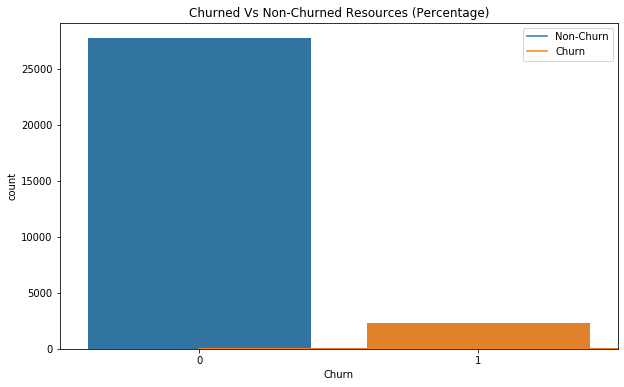

In [56]:
plt.figure(figsize=(10, 6))
plt.title('Churned Vs Non-Churned Resources (Percentage)')
plt.plot(churn_HVC['Churn']==0, label ='Non-Churn')
plt.plot(churn_HVC['Churn']==1, label ='Churn')
sns.set_color_codes("pastel")
sns.countplot(x='Churn', data=churn_HVC)
locs, labels = plt.xticks()
plt.legend(loc='best')
plt.show()


Overall **Churn rate is about  7.63%**. There are 92.36% Non-Churn Data

In [57]:
churn_HVC.columns

Index(['arpu_8', 'onnet_mou_8', 'offnet_mou_8', 'roam_ic_mou_8',
       'roam_og_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8', 'loc_og_mou_8',
       'std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'std_og_t2f_mou_8',
       'std_og_mou_8', 'spl_og_mou_8', 'total_og_mou_8', 'loc_ic_t2t_mou_8',
       'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_8',
       'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8',
       'std_ic_mou_8', 'total_ic_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_8',
       'ic_others_8', 'total_rech_num_8', 'total_rech_amt_8', 'max_rech_amt_8',
       'last_day_rch_amt_8', 'total_rech_data_8', 'max_rech_data_8',
       'av_rech_amt_data_8', 'vol_2g_mb_8', 'vol_3g_mb_8', 'monthly_2g_8',
       'sachet_2g_8', 'monthly_3g_8', 'sachet_3g_8', 'fb_user_8', 'aon',
       'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g',
       'avg_rech_amt_67', 'avg_arpu_67', 'avg_onnet_mou_67',
       'avg_offnet_mou_67', 'avg_roam_ic

### Checking for Correlation among the variables

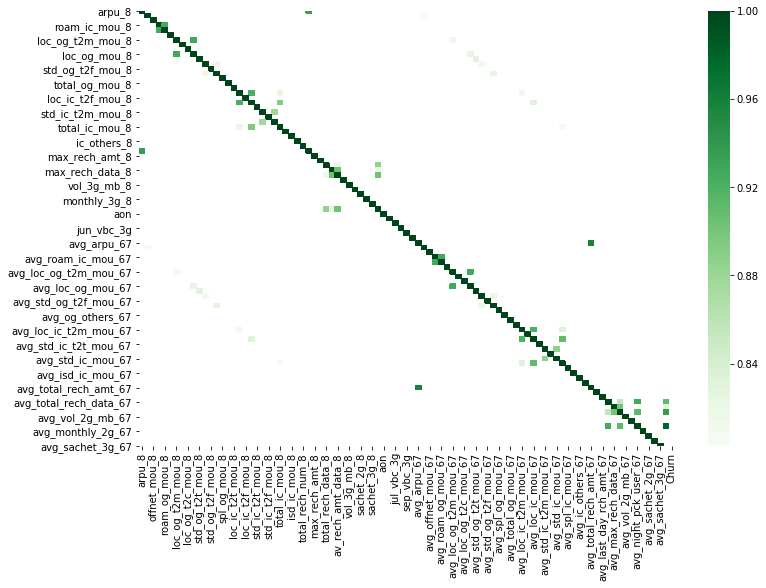

In [58]:
#Displaying features that are highly correlated > 80%
corr = churn_HVC.corr().abs() # mapping features to their absolute correlation values

cor_target = corr[corr>=0.8]
plt.figure(figsize=(12,8))
sns.heatmap(cor_target, cmap="Greens")

In [59]:
# set equality (self correlation) as zero
corr[corr == 1] = 0

# of each feature, finding the max correlation and sort the resulting array in ascending order
corr_cols = corr.max().sort_values(ascending=False)

# display the highly correlated features
#cor = cor.stack()
cor = corr_cols[(corr_cols > 0.80) | (corr_cols < -0.80)].sort_values()
display(corr_cols[(corr_cols > 0.80) | (corr_cols < -0.80)])
#print(len(cor))
High_cor_variable = cor.index.tolist()

avg_night_pck_user_67      0.981132
avg_fb_user_67             0.981132
avg_arpu_67                0.957185
avg_total_rech_amt_67      0.957185
avg_av_rech_amt_data_67    0.936414
total_rech_amt_8           0.934744
arpu_8                     0.934744
loc_og_t2m_mou_8           0.927910
loc_og_mou_8               0.927910
avg_loc_og_mou_67          0.927599
avg_loc_og_t2m_mou_67      0.927599
avg_roam_og_mou_67         0.927516
avg_roam_ic_mou_67         0.927516
avg_total_rech_data_67     0.927205
roam_og_mou_8              0.925849
roam_ic_mou_8              0.925849
loc_ic_mou_8               0.922176
loc_ic_t2m_mou_8           0.922176
avg_loc_ic_mou_67          0.919920
avg_loc_ic_t2m_mou_67      0.919920
avg_total_ic_mou_67        0.909913
av_rech_amt_data_8         0.903793
max_rech_data_8            0.903793
fb_user_8                  0.902482
avg_max_rech_data_67       0.900966
total_ic_mou_8             0.893631
avg_std_ic_t2m_mou_67      0.886419
avg_std_ic_mou_67          0

In [60]:
print(High_cor_variable)

['onnet_mou_8', 'avg_onnet_mou_67', 'std_og_t2m_mou_8', 'avg_std_og_t2m_mou_67', 'avg_std_og_mou_67', 'std_og_mou_8', 'std_og_t2t_mou_8', 'avg_std_og_t2t_mou_67', 'std_ic_mou_8', 'std_ic_t2m_mou_8', 'total_rech_data_8', 'avg_std_ic_t2m_mou_67', 'avg_std_ic_mou_67', 'total_ic_mou_8', 'avg_max_rech_data_67', 'fb_user_8', 'max_rech_data_8', 'av_rech_amt_data_8', 'avg_total_ic_mou_67', 'avg_loc_ic_t2m_mou_67', 'avg_loc_ic_mou_67', 'loc_ic_t2m_mou_8', 'loc_ic_mou_8', 'roam_ic_mou_8', 'roam_og_mou_8', 'avg_total_rech_data_67', 'avg_roam_ic_mou_67', 'avg_roam_og_mou_67', 'avg_loc_og_t2m_mou_67', 'avg_loc_og_mou_67', 'loc_og_mou_8', 'loc_og_t2m_mou_8', 'arpu_8', 'total_rech_amt_8', 'avg_av_rech_amt_data_67', 'avg_total_rech_amt_67', 'avg_arpu_67', 'avg_fb_user_67', 'avg_night_pck_user_67']


In [61]:
#Dropping the couple of Highly Correlated columns which will not useful for our current analysis

drop_cor_var = [ 'aug_vbc_3g','jul_vbc_3g','loc_og_t2t_mou_8', 'avg_loc_og_t2t_mou_67', 'avg_std_ic_t2m_mou_67',  
                'avg_std_og_t2m_mou_67', 'avg_loc_ic_t2m_mou_67', 'avg_loc_og_t2m_mou_67','loc_og_t2m_mou_8',
                'std_ic_t2m_mou_8', 'loc_ic_t2m_mou_8', 'std_og_t2m_mou_8', 'avg_std_og_t2t_mou_67', 'std_og_t2t_mou_8']

churn_HVC.drop(drop_cor_var, axis=1, inplace = True)

churn_HVC.shape

(30019, 79)

## Data Preparation

In [62]:
# Converting Age on network (number of days the customer is using the operator T network) in months
churn_HVC['aon_mon'] = churn_HVC['aon']/30
churn_HVC.drop('aon', axis=1, inplace=True)
churn_HVC['aon_mon'].head()

0    32.266667
1    26.733333
2    10.500000
3    17.033333
4    24.000000
Name: aon_mon, dtype: float64

Text(0.5, 1.0, 'Tenure Graph')

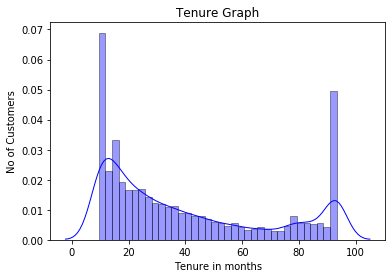

In [63]:
# Tenure of the customers
ax = sns.distplot(churn_HVC['aon_mon'], hist=True, bins=int(180/5), color = 'blue',hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 1}) 
             
ax.set_ylabel('No of Customers')
ax.set_xlabel('Tenure in months')
ax.set_title('Tenure Graph')


- This graph says that the as the tenure increases (>40 months) the customers are declining

In [64]:
#Checking for the tenure Range (Binning)
tenure_range = [0, 6, 12, 24, 60, 61]
tenure_label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
churn_HVC['tenure_range'] = pd.cut(churn_HVC['aon_mon'], tenure_range, labels=tenure_label)
churn_HVC['tenure_range'].head()

0    2-5 Yrs    
1    2-5 Yrs    
2    6-12 Months
3    1-2 Yrs    
4    1-2 Yrs    
Name: tenure_range, dtype: category
Categories (5, object): [0-6 Months < 6-12 Months < 1-2 Yrs < 2-5 Yrs < 5 Yrs and above]

In [65]:
churn_HVC.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2f_mou_8,std_og_mou_8,spl_og_mou_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,total_rech_data_8,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,fb_user_8,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_67,avg_arpu_67,avg_onnet_mou_67,avg_offnet_mou_67,avg_roam_ic_mou_67,avg_roam_og_mou_67,avg_loc_og_t2f_mou_67,avg_loc_og_t2c_mou_67,avg_loc_og_mou_67,avg_std_og_t2f_mou_67,avg_std_og_mou_67,avg_spl_og_mou_67,avg_og_others_67,avg_total_og_mou_67,avg_loc_ic_t2t_mou_67,avg_loc_ic_t2f_mou_67,avg_loc_ic_mou_67,avg_std_ic_t2t_mou_67,avg_std_ic_t2f_mou_67,avg_std_ic_mou_67,avg_total_ic_mou_67,avg_spl_ic_mou_67,avg_isd_ic_mou_67,avg_ic_others_67,avg_total_rech_num_67,avg_total_rech_amt_67,avg_max_rech_amt_67,avg_last_day_rch_amt_67,avg_total_rech_data_67,avg_max_rech_data_67,avg_av_rech_amt_data_67,avg_vol_2g_mb_67,avg_vol_3g_mb_67,avg_night_pck_user_67,avg_monthly_2g_67,avg_sachet_2g_67,avg_monthly_3g_67,avg_sachet_3g_67,avg_fb_user_67,Churn,aon_mon,tenure_range
0,213.803000,0.21,6.54,0.000000,0.00000,0.00,0.0,1.16,0.000000,0.0000,0.00,0.0000,0.16,1.15,7.156,0.00,0.00,0.000,5.44,0.0,0.000000,0.0000,2.0,252.0,225.0,150.0,1.0,154.0,196.0,5.75,109.61,0.0,0.0,1.0,0.0,1.0,101.20,3.58,494.5,206.100500,133.03334,197.490355,8.549956,11.865035,3.771999,1.245778,142.935825,1.12201,171.741327,4.447545,0.227079,0.105,47.956443,12.342001,167.6053,9.793949,2.18666,33.172506,2.6350,0.047571,7.897772,0.933808,3.5,307.0,201.0,129.0,1.0,154.0,187.5,15.725,117.165,0.0,0.0,0.0,1.0,0.0,1.0,1,32.266667,2-5 Yrs
1,618.158096,52.29,325.91,7.292981,9.97189,8.79,0.0,255.79,1.067792,77.8400,6.50,350.1600,27.31,27.19,188.040,19.03,2.55,73.144,428.74,0.0,8.442001,0.9708,7.0,736.0,225.0,150.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,-1.0,18.74,0.00,731.5,618.662068,56.26000,461.110000,8.929949,15.214366,9.122000,0.000000,343.252000,1.12201,68.000000,2.250000,0.000000,548.385,45.200000,28.964000,369.8390,15.505000,2.55500,74.362000,469.9362,0.105000,5.197468,0.933808,5.0,731.5,201.0,0.0,0.0,0.0,0.0,0.000,0.000,-1.0,0.0,0.0,0.0,0.0,-1.0,1,26.733333,2-5 Yrs
2,137.362000,35.08,136.48,0.000000,0.00000,0.00,3.1,63.04,0.000000,98.2800,10.23,171.5600,0.31,0.00,15.790,0.10,0.00,0.750,16.54,0.0,0.000000,0.0000,14.0,120.0,30.0,10.0,2.0,23.0,69.0,0.03,11.94,0.0,3.0,0.0,0.0,1.0,122.16,0.00,696.0,435.472000,332.53052,87.645000,0.000000,0.000000,0.000000,0.000000,317.615000,0.00000,136.870000,0.000000,0.000000,470.010,16.840000,0.000000,52.6300,0.290000,0.00000,13.545000,66.1750,0.000000,0.000000,0.000000,15.5,519.0,122.0,25.0,1.0,77.0,88.5,48.933,169.967,-0.5,0.5,0.5,0.0,0.0,0.0,0,10.500000,6-12 Months
3,187.894000,70.61,162.76,0.000000,0.00000,8.79,0.0,205.93,0.000000,21.5300,5.91,233.3800,28.89,27.19,211.780,6.33,2.18,73.144,294.46,0.0,0.230000,0.0000,2.0,160.0,130.0,130.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,-1.0,21.89,0.00,459.0,365.422000,62.26000,263.015000,1.415000,4.909366,2.240000,0.000000,265.775000,0.00000,48.990000,1.630000,0.000000,316.410,56.385000,8.695000,253.3450,19.610000,0.25500,74.362000,373.2100,0.000000,0.000000,0.000000,8.0,459.0,110.0,100.0,0.0,0.0,0.0,0.000,0.000,-1.0,0.0,0.0,0.0,0.0,-1.0,0,17.033333,1-2 Yrs
4,618.158096,85.14,466.54,0.000000,0.00000,1.58,0.0,129.74,0.000000,519.7608,0.00,791.4908,19.54,10.39,159.110,0.18,0.00,73.144,261.04,0.0,0.000000,0.0000,15.0,718.0,50.0,50.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,-1.0,0.00,0.00,640.0,556.103000,117.26000,466.540280,0.000000,0.000000,0.375000,0.000000,95.565000,0.00000,517.637200,0.000000,0.000000,791.761,6.335000,3.725000,106.5050,10.020000,0.00000,58.602000,169.4900,0.000000,0.000000,0.000000,15.5,640.0,50.0,25.0,0.0,0.0,0.0,0.000,0.000,-1.0,0.0,0.0,0.0,0.0

In [66]:
#Checking for duplicates
churn_HVC.loc[churn_HVC.duplicated()]

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2f_mou_8,std_og_mou_8,spl_og_mou_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,total_rech_data_8,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,fb_user_8,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_67,avg_arpu_67,avg_onnet_mou_67,avg_offnet_mou_67,avg_roam_ic_mou_67,avg_roam_og_mou_67,avg_loc_og_t2f_mou_67,avg_loc_og_t2c_mou_67,avg_loc_og_mou_67,avg_std_og_t2f_mou_67,avg_std_og_mou_67,avg_spl_og_mou_67,avg_og_others_67,avg_total_og_mou_67,avg_loc_ic_t2t_mou_67,avg_loc_ic_t2f_mou_67,avg_loc_ic_mou_67,avg_std_ic_t2t_mou_67,avg_std_ic_t2f_mou_67,avg_std_ic_mou_67,avg_total_ic_mou_67,avg_spl_ic_mou_67,avg_isd_ic_mou_67,avg_ic_others_67,avg_total_rech_num_67,avg_total_rech_amt_67,avg_max_rech_amt_67,avg_last_day_rch_amt_67,avg_total_rech_data_67,avg_max_rech_data_67,avg_av_rech_amt_data_67,avg_vol_2g_mb_67,avg_vol_3g_mb_67,avg_night_pck_user_67,avg_monthly_2g_67,avg_sachet_2g_67,avg_monthly_3g_67,avg_sachet_3g_67,avg_fb_user_67,Churn,aon_mon,tenure_range


- No Duplicate Records

In [67]:
# Adding up the missing values (column-wise)
churn_HVC.isnull().sum()
#round(churn_HVC.isnull().sum(axis=1)/len(churn_HVC.index), 2)*100

arpu_8                     0   
onnet_mou_8                0   
offnet_mou_8               0   
roam_ic_mou_8              0   
roam_og_mou_8              0   
loc_og_t2f_mou_8           0   
loc_og_t2c_mou_8           0   
loc_og_mou_8               0   
std_og_t2f_mou_8           0   
std_og_mou_8               0   
spl_og_mou_8               0   
total_og_mou_8             0   
loc_ic_t2t_mou_8           0   
loc_ic_t2f_mou_8           0   
loc_ic_mou_8               0   
std_ic_t2t_mou_8           0   
std_ic_t2f_mou_8           0   
std_ic_mou_8               0   
total_ic_mou_8             0   
spl_ic_mou_8               0   
isd_ic_mou_8               0   
ic_others_8                0   
total_rech_num_8           0   
total_rech_amt_8           0   
max_rech_amt_8             0   
last_day_rch_amt_8         0   
total_rech_data_8          0   
max_rech_data_8            0   
av_rech_amt_data_8         0   
vol_2g_mb_8                0   
vol_3g_mb_8                0   
monthly_

- There are missing values in the rows for `tenure_range` column

In [68]:
# Dropping the rows with null values for specific columns 
# Removing NaN tenure_range rows

churn_HVC.drop(['tenure_range'], axis=1, inplace = True)
churn_HVC.shape

(30019, 79)

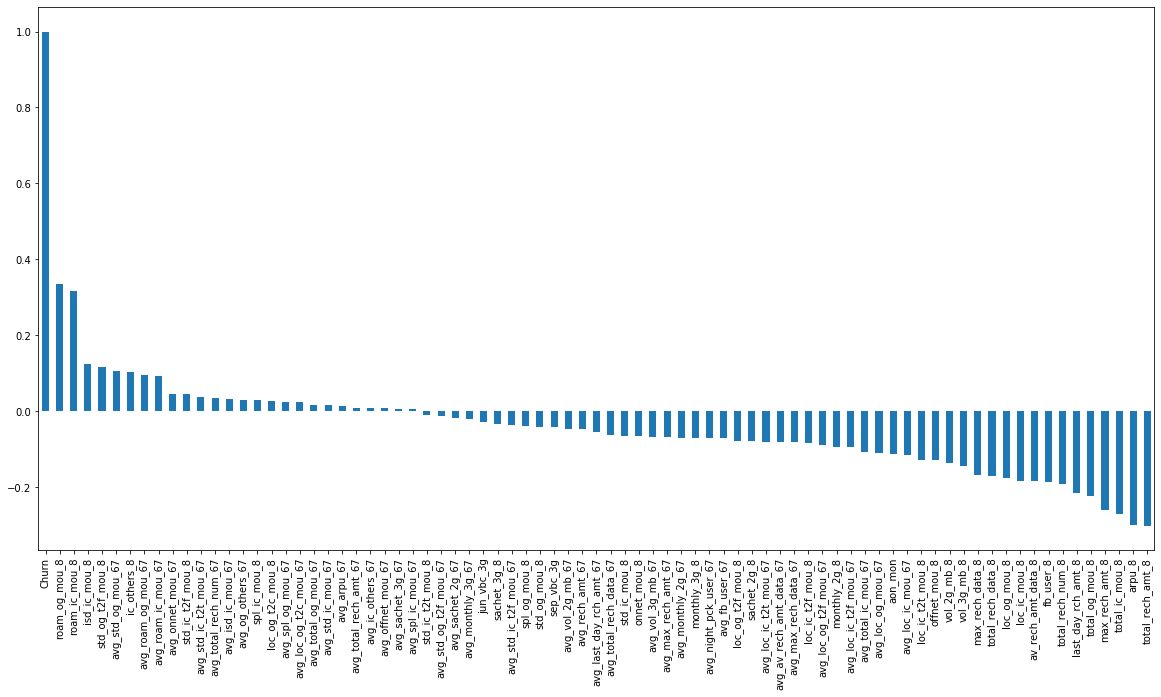

In [69]:
# Correlation of churn with other columns
plt.figure(figsize=(20,10))
churn_HVC.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

1. Avg Calls (outgoing & romaning) for 6 & 7th months are positively correlated with churn. 
2. Avg Revenue, No. Of Recharge for 8th month has negative correlation with churn.

In [70]:
churn_HVC.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2f_mou_8,std_og_mou_8,spl_og_mou_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,total_rech_data_8,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,fb_user_8,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_67,avg_arpu_67,avg_onnet_mou_67,avg_offnet_mou_67,avg_roam_ic_mou_67,avg_roam_og_mou_67,avg_loc_og_t2f_mou_67,avg_loc_og_t2c_mou_67,avg_loc_og_mou_67,avg_std_og_t2f_mou_67,avg_std_og_mou_67,avg_spl_og_mou_67,avg_og_others_67,avg_total_og_mou_67,avg_loc_ic_t2t_mou_67,avg_loc_ic_t2f_mou_67,avg_loc_ic_mou_67,avg_std_ic_t2t_mou_67,avg_std_ic_t2f_mou_67,avg_std_ic_mou_67,avg_total_ic_mou_67,avg_spl_ic_mou_67,avg_isd_ic_mou_67,avg_ic_others_67,avg_total_rech_num_67,avg_total_rech_amt_67,avg_max_rech_amt_67,avg_last_day_rch_amt_67,avg_total_rech_data_67,avg_max_rech_data_67,avg_av_rech_amt_data_67,avg_vol_2g_mb_67,avg_vol_3g_mb_67,avg_night_pck_user_67,avg_monthly_2g_67,avg_sachet_2g_67,avg_monthly_3g_67,avg_sachet_3g_67,avg_fb_user_67,Churn,aon_mon
0,213.803000,0.21,6.54,0.000000,0.00000,0.00,0.0,1.16,0.000000,0.0000,0.00,0.0000,0.16,1.15,7.156,0.00,0.00,0.000,5.44,0.0,0.000000,0.0000,2.0,252.0,225.0,150.0,1.0,154.0,196.0,5.75,109.61,0.0,0.0,1.0,0.0,1.0,101.20,3.58,494.5,206.100500,133.03334,197.490355,8.549956,11.865035,3.771999,1.245778,142.935825,1.12201,171.741327,4.447545,0.227079,0.105,47.956443,12.342001,167.6053,9.793949,2.18666,33.172506,2.6350,0.047571,7.897772,0.933808,3.5,307.0,201.0,129.0,1.0,154.0,187.5,15.725,117.165,0.0,0.0,0.0,1.0,0.0,1.0,1,32.266667
1,618.158096,52.29,325.91,7.292981,9.97189,8.79,0.0,255.79,1.067792,77.8400,6.50,350.1600,27.31,27.19,188.040,19.03,2.55,73.144,428.74,0.0,8.442001,0.9708,7.0,736.0,225.0,150.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,-1.0,18.74,0.00,731.5,618.662068,56.26000,461.110000,8.929949,15.214366,9.122000,0.000000,343.252000,1.12201,68.000000,2.250000,0.000000,548.385,45.200000,28.964000,369.8390,15.505000,2.55500,74.362000,469.9362,0.105000,5.197468,0.933808,5.0,731.5,201.0,0.0,0.0,0.0,0.0,0.000,0.000,-1.0,0.0,0.0,0.0,0.0,-1.0,1,26.733333
2,137.362000,35.08,136.48,0.000000,0.00000,0.00,3.1,63.04,0.000000,98.2800,10.23,171.5600,0.31,0.00,15.790,0.10,0.00,0.750,16.54,0.0,0.000000,0.0000,14.0,120.0,30.0,10.0,2.0,23.0,69.0,0.03,11.94,0.0,3.0,0.0,0.0,1.0,122.16,0.00,696.0,435.472000,332.53052,87.645000,0.000000,0.000000,0.000000,0.000000,317.615000,0.00000,136.870000,0.000000,0.000000,470.010,16.840000,0.000000,52.6300,0.290000,0.00000,13.545000,66.1750,0.000000,0.000000,0.000000,15.5,519.0,122.0,25.0,1.0,77.0,88.5,48.933,169.967,-0.5,0.5,0.5,0.0,0.0,0.0,0,10.500000
3,187.894000,70.61,162.76,0.000000,0.00000,8.79,0.0,205.93,0.000000,21.5300,5.91,233.3800,28.89,27.19,211.780,6.33,2.18,73.144,294.46,0.0,0.230000,0.0000,2.0,160.0,130.0,130.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,-1.0,21.89,0.00,459.0,365.422000,62.26000,263.015000,1.415000,4.909366,2.240000,0.000000,265.775000,0.00000,48.990000,1.630000,0.000000,316.410,56.385000,8.695000,253.3450,19.610000,0.25500,74.362000,373.2100,0.000000,0.000000,0.000000,8.0,459.0,110.0,100.0,0.0,0.0,0.0,0.000,0.000,-1.0,0.0,0.0,0.0,0.0,-1.0,0,17.033333
4,618.158096,85.14,466.54,0.000000,0.00000,1.58,0.0,129.74,0.000000,519.7608,0.00,791.4908,19.54,10.39,159.110,0.18,0.00,73.144,261.04,0.0,0.000000,0.0000,15.0,718.0,50.0,50.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,-1.0,0.00,0.00,640.0,556.103000,117.26000,466.540280,0.000000,0.000000,0.375000,0.000000,95.565000,0.00000,517.637200,0.000000,0.000000,791.761,6.335000,3.725000,106.5050,10.020000,0.00000,58.602000,169.4900,0.000000,0.000000,0.000000,15.5,640.0,50.0,25.0,0.0,0.0,0.0,0.000,0.000,-1.0,0.0,0.0,0.0,0.0,-1.0,0,24.000000


In [71]:
churn_HVC.columns

Index(['arpu_8', 'onnet_mou_8', 'offnet_mou_8', 'roam_ic_mou_8',
       'roam_og_mou_8', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8', 'loc_og_mou_8',
       'std_og_t2f_mou_8', 'std_og_mou_8', 'spl_og_mou_8', 'total_og_mou_8',
       'loc_ic_t2t_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_8',
       'std_ic_t2t_mou_8', 'std_ic_t2f_mou_8', 'std_ic_mou_8',
       'total_ic_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_8', 'ic_others_8',
       'total_rech_num_8', 'total_rech_amt_8', 'max_rech_amt_8',
       'last_day_rch_amt_8', 'total_rech_data_8', 'max_rech_data_8',
       'av_rech_amt_data_8', 'vol_2g_mb_8', 'vol_3g_mb_8', 'monthly_2g_8',
       'sachet_2g_8', 'monthly_3g_8', 'sachet_3g_8', 'fb_user_8', 'jun_vbc_3g',
       'sep_vbc_3g', 'avg_rech_amt_67', 'avg_arpu_67', 'avg_onnet_mou_67',
       'avg_offnet_mou_67', 'avg_roam_ic_mou_67', 'avg_roam_og_mou_67',
       'avg_loc_og_t2f_mou_67', 'avg_loc_og_t2c_mou_67', 'avg_loc_og_mou_67',
       'avg_std_og_t2f_mou_67', 'avg_std_og_mou_67', 'avg_spl_og_m

In [72]:
#Dropping couple more columns as they are not helpful for further analysis
drop_col2 = ['loc_og_t2f_mou_8','loc_og_t2c_mou_8','std_og_t2f_mou_8','loc_ic_t2t_mou_8', 'loc_ic_t2f_mou_8','std_ic_t2t_mou_8',
             'std_ic_t2f_mou_8','jun_vbc_3g','avg_loc_og_t2f_mou_67', 'avg_loc_og_t2c_mou_67','avg_std_og_t2f_mou_67',
            'avg_loc_ic_t2t_mou_67','avg_loc_ic_t2f_mou_67','avg_std_ic_t2t_mou_67','avg_std_ic_t2f_mou_67']
churn_HVC.drop(drop_col2, axis=1, inplace = True)
churn_HVC.shape

(30019, 64)

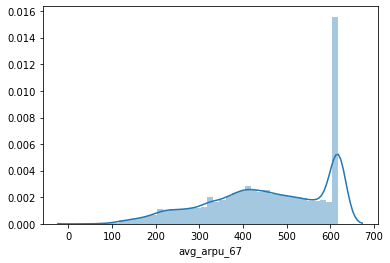

In [73]:
sns.distplot(churn_HVC['avg_arpu_67'], hist= True)

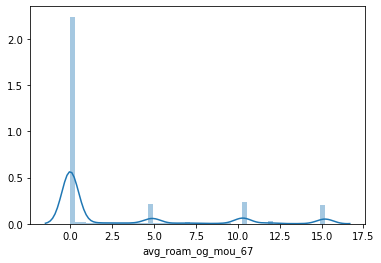

In [74]:
sns.distplot(churn_HVC['avg_roam_og_mou_67'], hist= True)

- There is imbalance in the data. The data is scewed

In [75]:
def dist_plot(x,y):
    
    churn_HVC.groupby([x,y]).size().unstack(level=-1).plot(kind='bar', figsize=(7,4))
    plt.xlabel(x)
    plt.ylabel('count')
    plt.legend(loc='best')
    plt.title("{X} Vs {Y}".format(X=x,Y=y))
    plt.show()

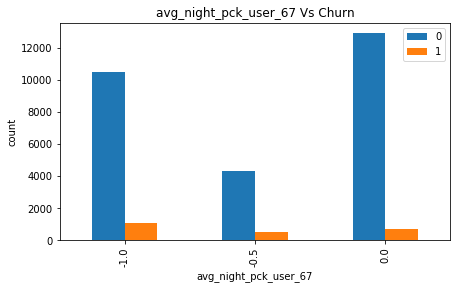

In [76]:
dist_plot('avg_night_pck_user_67','Churn')

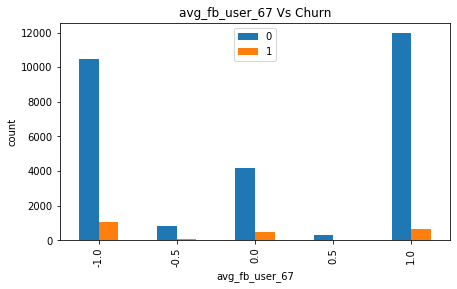

In [77]:
dist_plot('avg_fb_user_67','Churn')

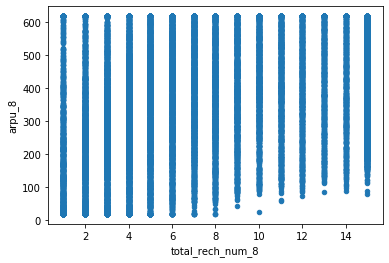

In [78]:
# scatter plot between total recharge and avg revenue for the 8th month
churn_HVC[['total_rech_num_8', 'arpu_8']].plot.scatter(x = 'total_rech_num_8', y='arpu_8')

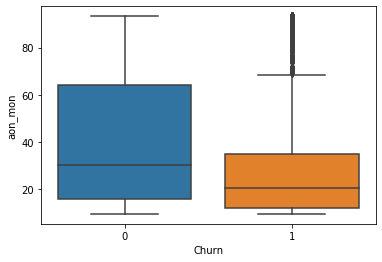

In [79]:
sns.boxplot(x = churn_HVC.Churn, y = churn_HVC.aon_mon)

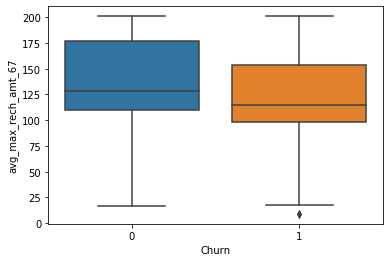

In [80]:
sns.boxplot(x = churn_HVC.Churn, y = churn_HVC.avg_max_rech_amt_67)

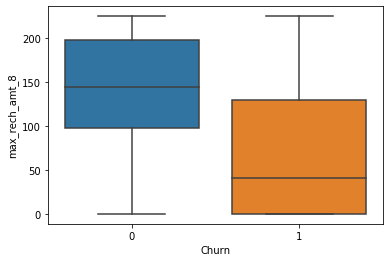

In [81]:
sns.boxplot(x = churn_HVC.Churn, y = churn_HVC.max_rech_amt_8)

Text(0, 0.5, 'Churn Rate')

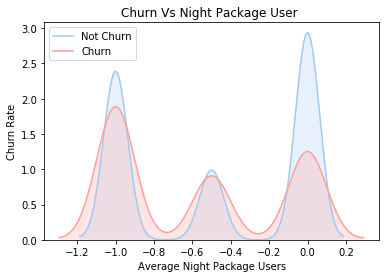

In [82]:
# Plotting the KDE Plot 
sns.kdeplot(churn_HVC.loc[(churn_HVC['Churn']==0), 'avg_night_pck_user_67'], color='b', shade=True, Label='Not Churn') 
sns.kdeplot(churn_HVC.loc[(churn_HVC['Churn']==1), 'avg_night_pck_user_67'], color='r', shade=True, Label ='Churn') 
  
# Setting the X and Y Label 
plt.title('Churn Vs Night Package User ')
plt.xlabel('Average Night Package Users') 
plt.ylabel('Churn Rate') 

- Churn rate is high in (-1) category of Night Package users when compared to 0 and 1 category

Text(0, 0.5, 'Churn Rate')

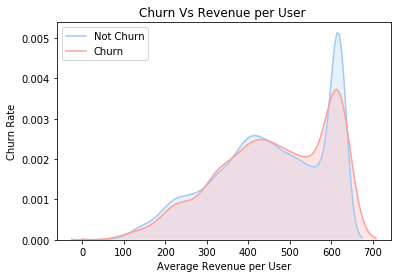

In [83]:
# Plotting the KDE Plot 
sns.kdeplot(churn_HVC.loc[(churn_HVC['Churn']==0), 'avg_arpu_67'], color='b', shade=True, Label='Not Churn') 
sns.kdeplot(churn_HVC.loc[(churn_HVC['Churn']==1), 'avg_arpu_67'], color='r', shade=True, Label ='Churn') 
  
# Setting the X and Y Label 
plt.title('Churn Vs Revenue per User ')
plt.xlabel('Average Revenue per User') 
plt.ylabel('Churn Rate') 

Text(0, 0.5, 'Churn Rate')

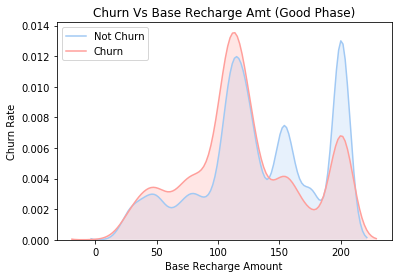

In [84]:
# Plotting the KDE Plot 
sns.kdeplot(churn_HVC.loc[(churn_HVC['Churn']==0), 'avg_max_rech_amt_67'], color='b', shade=True, Label='Not Churn') 
sns.kdeplot(churn_HVC.loc[(churn_HVC['Churn']==1), 'avg_max_rech_amt_67'], color='r', shade=True, Label ='Churn') 
  
# Setting the X and Y Label 
plt.title('Churn Vs Base Recharge Amt (Good Phase)')
plt.xlabel('Base Recharge Amount') 
plt.ylabel('Churn Rate') 

- There is a high churn rate seen when the base Recharge amount is below 150

Text(0, 0.5, 'Churn Rate')

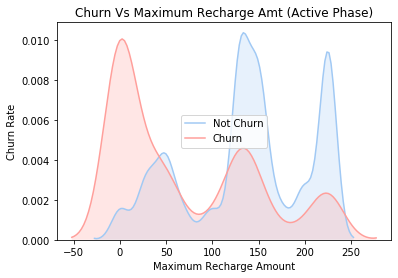

In [85]:
# Plotting the KDE Plot 
sns.kdeplot(churn_HVC.loc[(churn_HVC['Churn']==0), 'max_rech_amt_8'], color='b', shade=True, Label='Not Churn') 
sns.kdeplot(churn_HVC.loc[(churn_HVC['Churn']==1), 'max_rech_amt_8'], color='r', shade=True, Label ='Churn') 
  
# Setting the X and Y Label 
plt.title('Churn Vs Maximum Recharge Amt (Active Phase)')
plt.xlabel('Maximum Recharge Amount') 
plt.ylabel('Churn Rate') 

- It is seen that there is higher churn rate seen in this active phase when a customer is recharging for an amount less than 100

In [86]:
# Create a copy of the dataset before modelling
Churn_data_cpy = churn_HVC[:].copy()
Churn_data_cpy.shape

(30019, 64)

In [87]:
Churn_data_cpy.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_mou_8,std_og_mou_8,spl_og_mou_8,total_og_mou_8,loc_ic_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,total_rech_data_8,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,fb_user_8,sep_vbc_3g,avg_rech_amt_67,avg_arpu_67,avg_onnet_mou_67,avg_offnet_mou_67,avg_roam_ic_mou_67,avg_roam_og_mou_67,avg_loc_og_mou_67,avg_std_og_mou_67,avg_spl_og_mou_67,avg_og_others_67,avg_total_og_mou_67,avg_loc_ic_mou_67,avg_std_ic_mou_67,avg_total_ic_mou_67,avg_spl_ic_mou_67,avg_isd_ic_mou_67,avg_ic_others_67,avg_total_rech_num_67,avg_total_rech_amt_67,avg_max_rech_amt_67,avg_last_day_rch_amt_67,avg_total_rech_data_67,avg_max_rech_data_67,avg_av_rech_amt_data_67,avg_vol_2g_mb_67,avg_vol_3g_mb_67,avg_night_pck_user_67,avg_monthly_2g_67,avg_sachet_2g_67,avg_monthly_3g_67,avg_sachet_3g_67,avg_fb_user_67,Churn,aon_mon
0,213.803000,0.21,6.54,0.000000,0.00000,1.16,0.0000,0.00,0.0000,7.156,0.000,5.44,0.0,0.000000,0.0000,2.0,252.0,225.0,150.0,1.0,154.0,196.0,5.75,109.61,0.0,0.0,1.0,0.0,1.0,3.58,494.5,206.100500,133.03334,197.490355,8.549956,11.865035,142.935825,171.741327,4.447545,0.227079,0.105,167.6053,33.172506,2.6350,0.047571,7.897772,0.933808,3.5,307.0,201.0,129.0,1.0,154.0,187.5,15.725,117.165,0.0,0.0,0.0,1.0,0.0,1.0,1,32.266667
1,618.158096,52.29,325.91,7.292981,9.97189,255.79,77.8400,6.50,350.1600,188.040,73.144,428.74,0.0,8.442001,0.9708,7.0,736.0,225.0,150.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,-1.0,0.00,731.5,618.662068,56.26000,461.110000,8.929949,15.214366,343.252000,68.000000,2.250000,0.000000,548.385,369.8390,74.362000,469.9362,0.105000,5.197468,0.933808,5.0,731.5,201.0,0.0,0.0,0.0,0.0,0.000,0.000,-1.0,0.0,0.0,0.0,0.0,-1.0,1,26.733333
2,137.362000,35.08,136.48,0.000000,0.00000,63.04,98.2800,10.23,171.5600,15.790,0.750,16.54,0.0,0.000000,0.0000,14.0,120.0,30.0,10.0,2.0,23.0,69.0,0.03,11.94,0.0,3.0,0.0,0.0,1.0,0.00,696.0,435.472000,332.53052,87.645000,0.000000,0.000000,317.615000,136.870000,0.000000,0.000000,470.010,52.6300,13.545000,66.1750,0.000000,0.000000,0.000000,15.5,519.0,122.0,25.0,1.0,77.0,88.5,48.933,169.967,-0.5,0.5,0.5,0.0,0.0,0.0,0,10.500000
3,187.894000,70.61,162.76,0.000000,0.00000,205.93,21.5300,5.91,233.3800,211.780,73.144,294.46,0.0,0.230000,0.0000,2.0,160.0,130.0,130.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,-1.0,0.00,459.0,365.422000,62.26000,263.015000,1.415000,4.909366,265.775000,48.990000,1.630000,0.000000,316.410,253.3450,74.362000,373.2100,0.000000,0.000000,0.000000,8.0,459.0,110.0,100.0,0.0,0.0,0.0,0.000,0.000,-1.0,0.0,0.0,0.0,0.0,-1.0,0,17.033333
4,618.158096,85.14,466.54,0.000000,0.00000,129.74,519.7608,0.00,791.4908,159.110,73.144,261.04,0.0,0.000000,0.0000,15.0,718.0,50.0,50.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,-1.0,0.00,640.0,556.103000,117.26000,466.540280,0.000000,0.000000,95.565000,517.637200,0.000000,0.000000,791.761,106.5050,58.602000,169.4900,0.000000,0.000000,0.000000,15.5,640.0,50.0,25.0,0.0,0.0,0.0,0.000,0.000,-1.0,0.0,0.0,0.0,0.0,-1.0,0,24.000000


## Scaling of Data

In [88]:
# X & y dataset for model building, X will obviously not have "churn" and y will only have "churn"
X = Churn_data_cpy.drop(['Churn'], axis=1)
y = Churn_data_cpy['Churn']

Churn_data_cpy.drop('Churn', axis=1, inplace=True)

In [89]:
#from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

#scaling continuous variables in the dataset
scaler = StandardScaler()

X_cols = X.columns
X[X_cols] = scaler.fit_transform(X[X_cols])

X.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_mou_8,std_og_mou_8,spl_og_mou_8,total_og_mou_8,loc_ic_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,total_rech_data_8,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,fb_user_8,sep_vbc_3g,avg_rech_amt_67,avg_arpu_67,avg_onnet_mou_67,avg_offnet_mou_67,avg_roam_ic_mou_67,avg_roam_og_mou_67,avg_loc_og_mou_67,avg_std_og_mou_67,avg_spl_og_mou_67,avg_og_others_67,avg_total_og_mou_67,avg_loc_ic_mou_67,avg_std_ic_mou_67,avg_total_ic_mou_67,avg_spl_ic_mou_67,avg_isd_ic_mou_67,avg_ic_others_67,avg_total_rech_num_67,avg_total_rech_amt_67,avg_max_rech_amt_67,avg_last_day_rch_amt_67,avg_total_rech_data_67,avg_max_rech_data_67,avg_av_rech_amt_data_67,avg_vol_2g_mb_67,avg_vol_3g_mb_67,avg_night_pck_user_67,avg_monthly_2g_67,avg_sachet_2g_67,avg_monthly_3g_67,avg_sachet_3g_67,avg_fb_user_67,aon_mon
0,-1.006902,-1.064632,-1.343892,-0.486150,-0.489714,-1.243817,-0.836383,-0.767480,-1.327026,-1.273692,-0.909829,-1.288665,-0.339015,-0.495540,-0.529917,-1.324088,-0.896589,1.319306,1.301075,0.260588,1.488986,1.403122,-0.492859,0.017279,-0.383448,-0.389126,1.290938,-0.17795,1.070465,-0.080062,-1.007923,-1.847243,-0.098259,-0.366788,2.559937,1.939626,-0.216110,-0.121950,0.304476,0.488962,-1.610390,-0.093993,0.303252,-1.462664,0.538001,2.522629,2.704333,-1.570746,-1.430614,1.362874,1.363840,0.215790,1.494554,1.371216,-0.342572,0.160452,1.020727,-0.467523,-0.419085,1.377502,-0.217003,1.080680,-0.262687
1,1.080443,-0.644393,0.523577,2.179227,2.134690,0.741040,-0.466257,0.593552,-0.167956,0.100967,1.859015,1.289715,-0.339015,2.192900,2.213577,-0.258743,1.101434,1.319306,1.301075,-0.924472,-0.793275,-0.879656,-0.647481,-0.654750,-0.383448,-0.389126,-0.337325,-0.17795,-0.991672,-0.149810,0.419267,1.213872,-0.721816,1.274704,2.698653,2.645558,1.392869,-0.613590,-0.292518,-0.526879,0.363356,1.489997,1.939137,1.568667,1.817866,1.479294,2.704333,-1.193103,1.245728,1.362874,-1.761516,-1.065675,-0.925768,-1.037318,-0.758921,-0.719927,-1.169808,-0.467523,-0.419085,-0.384599,-0.217003,-1.135723,-0.453541
2,-1.401502,-0.783262,-0.584087,-0.486150,-0.489714,-0.761458,-0.369066,1.374575,-0.759143,-1.208076,-0.881438,-1.221053,-0.339015,-0.495540,-0.529917,1.232739,-1.441504,-1.459682,-0.984665,1.445647,-0.452418,-0.076025,-0.646675,-0.581545,-0.383448,0.870346,-0.337325,-0.17795,1.070465,-0.149810,0.205490,-0.145358,1.522068,-1.050766,-0.561221,-0.561145,1.186947,-0.287209,-0.903762,-0.526879,0.081215,-0.994534,-0.476276,-1.050487,-0.522156,-0.528889,-0.601305,1.450396,-0.094019,-0.222686,-1.155827,0.215790,0.284393,0.099510,0.536671,0.557207,-0.074540,0.813940,-0.202955,-0.384599,-0.217003,-0.027521,-1.013457
3,-1.140648,-0.496567,-0.430418,-0.486150,-0.489714,0.352378,-0.734009,0.470012,-0.554511,0.281383,1.859015,0.471796,-0.339015,-0.422295,-0.529917,-1.324088,-1.276378,-0.034560,0.974541,-0.924472,-0.793275,-0.879656,-0.647481,-0.654750,-0.383448,-0.389126,-0.337325,-0.17795,-0.991672,-0.149810,-1.221700,-0.665113,-0.673084,0.041217,-0.044676,0.473593,0.770558,-0.703680,-0.460950,-0.526879,-0.471728,0.577561,1.939137,0.941215,-0.522156,-0.528889,-0.601305,-0.437818,-0.472301,-0.463530,0.661240,-1.065675,-0.925768,-1.037318,-0.758921,-0.719927,-1.169808,-0.467523,-0.419085,-0.384599,-0.217003,-1.135723,-0.788111
4,1.080443,-0.379323,1.345890,-0.486150,-0.489714,-0.241527,1.635058,-0.767480,1.292900,-0.118891,1.859015,0.268231,-0.339015,-0.495540,-0.529917,1.445808,1.027128,-1.174657,-0.331596,-0.924472,-0.793275,-0.879656,-0.647481,-0.654750,-0.383448,-0.389126,-0.337325,-0.17795,-0.991672,-0.149810,-0.131737,0.749698,-0.226371,1.308517,-0.561221,-0.561145,-0.596602,1.517283,-0.903762,-0.526879,1.239483,-0.572560,1.313212,-0.380294,-0.522156,-0.528889,-0.601305,1.450396,0.668849,-1.667753,-1.155827,-1.065675,-0.925768,-1.037318,-0.758921,-0.7199

In [90]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30019 entries, 0 to 30018
Data columns (total 63 columns):
arpu_8                     30019 non-null float64
onnet_mou_8                30019 non-null float64
offnet_mou_8               30019 non-null float64
roam_ic_mou_8              30019 non-null float64
roam_og_mou_8              30019 non-null float64
loc_og_mou_8               30019 non-null float64
std_og_mou_8               30019 non-null float64
spl_og_mou_8               30019 non-null float64
total_og_mou_8             30019 non-null float64
loc_ic_mou_8               30019 non-null float64
std_ic_mou_8               30019 non-null float64
total_ic_mou_8             30019 non-null float64
spl_ic_mou_8               30019 non-null float64
isd_ic_mou_8               30019 non-null float64
ic_others_8                30019 non-null float64
total_rech_num_8           30019 non-null float64
total_rech_amt_8           30019 non-null float64
max_rech_amt_8             30019 non-null

In [91]:
X.columns

Index(['arpu_8', 'onnet_mou_8', 'offnet_mou_8', 'roam_ic_mou_8',
       'roam_og_mou_8', 'loc_og_mou_8', 'std_og_mou_8', 'spl_og_mou_8',
       'total_og_mou_8', 'loc_ic_mou_8', 'std_ic_mou_8', 'total_ic_mou_8',
       'spl_ic_mou_8', 'isd_ic_mou_8', 'ic_others_8', 'total_rech_num_8',
       'total_rech_amt_8', 'max_rech_amt_8', 'last_day_rch_amt_8',
       'total_rech_data_8', 'max_rech_data_8', 'av_rech_amt_data_8',
       'vol_2g_mb_8', 'vol_3g_mb_8', 'monthly_2g_8', 'sachet_2g_8',
       'monthly_3g_8', 'sachet_3g_8', 'fb_user_8', 'sep_vbc_3g',
       'avg_rech_amt_67', 'avg_arpu_67', 'avg_onnet_mou_67',
       'avg_offnet_mou_67', 'avg_roam_ic_mou_67', 'avg_roam_og_mou_67',
       'avg_loc_og_mou_67', 'avg_std_og_mou_67', 'avg_spl_og_mou_67',
       'avg_og_others_67', 'avg_total_og_mou_67', 'avg_loc_ic_mou_67',
       'avg_std_ic_mou_67', 'avg_total_ic_mou_67', 'avg_spl_ic_mou_67',
       'avg_isd_ic_mou_67', 'avg_ic_others_67', 'avg_total_rech_num_67',
       'avg_total_rech_amt

- The Data is Scaled. We have few imbalance in the data. Let's per form Class Imbalance using SMOTE

## Class Imbalance 

<span style="color:green">There are a disproportionate ratio of observations in each class in this dataset. We will be using SMOTE (Synthetic Minority Over-sampling Technique)<br>
<br>This technique is followed to avoid overfitting which occurs when exact replicas of minority instances are added to the main dataset. A subset of data is taken from the minority class as an example and then new synthetic similar instances are created. These synthetic instances are then added to the original dataset. The new dataset is used as a sample to train the classification models.</span>

In [92]:
from imblearn.over_sampling import SMOTE

target_col = ["Churn"]
cols    = [i for i in churn_HVC.columns if i not in target_col]

#oversampling minority class using smote
os = SMOTE(random_state = 0)
os_smote_X,os_smote_Y = os.fit_sample(X,y)
os_smote_X = pd.DataFrame(data = os_smote_X,columns=cols)
os_smote_Y = pd.DataFrame(data = os_smote_Y,columns=target_col)

In [93]:
#Checking if the data is balanced
print(os_smote_X.shape)
print(os_smote_Y.shape)

print("Imbalance:", round((os_smote_Y != 0).sum()/((os_smote_Y == 0).sum()),2)*100)
#round(teleChurn_data.isnull().sum()/len(teleChurn_data.in

(55454, 63)
(55454, 1)
Imbalance: Churn    100.0
dtype: float64


Text(0.5, 0, 'Churn Data')

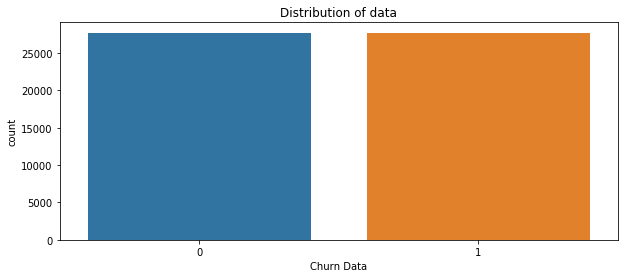

In [94]:
# Plotting the balanced data
plt.figure(figsize=(10,4))

ax = sns.countplot(x="Churn", data=os_smote_Y)
plt.title('Distribution of data')
plt.xlabel('Churn Data')

- Data is Balanced

In [95]:
from sklearn.model_selection import train_test_split
#Split train and test data

X_train,X_test,y_train,y_test = train_test_split(os_smote_X,os_smote_Y,test_size = .25 ,random_state = 111)

## Model Building- (Interpretable Model)

### Logistic Regression with RFE

In [127]:
import statsmodels.api as sm

# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                41590
Model:                            GLM   Df Residuals:                    41574
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14754.
Date:                Mon, 18 May 2020   Deviance:                       29507.
Time:                        16:40:19   Pearson chi2:                 1.26e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -1.7673      0.029    -60.925      0.000      -1.824      -1.710
roam_og_mou_8               0.6758      0.013     51.398      0.000       0.650       0.702
total_og_mou_8             -0.3222      0.023    -14.158      0.000      -0.367      -0.278
total_ic_mou_8             -1.0928      0.033    -32.938      0.000      -1.158      -1.028
total_rech_num_8           -0.3846      0.021    -18.220      0.000      -0.426      -0.343
last_day_rch_amt_8         -0.6429      0.018    -35.964      0.000      -0.678      -0.608
max_rech_data_8            -0.7338      0.044    -16.541      0.000      -0.821      -0.647
vol_3g_mb_8                -0.2332      0.032     -7.253      0.000      -0.296      -0.170
sachet_2g_8                -0.4701      0.034    -13.772      0.000      -0.537      -0.403
fb_user_8                   0.1465      0.039      3.734      0.000       0.070       0.223
sep_vbc_3g                 -1.6987      0.146    -11.629      0.000      -1.985      -1.412
avg_arpu_67                 0.3860      0.020     19.448      0.000       0.347       0.425
avg_total_ic_mou_67         0.4390      0.029     15.375      0.000       0.383       0.495
avg_av_rech_amt_data_67     0.3533      0.025     14.097      0.000       0.304       0.402
avg_monthly_2g_67          -0.3455      0.023    -14.987      0.000      -0.391      -0.300
aon_mon                    -0.3332      0.018    -18.181      0.000      -0.369      -0.297
===========================================================================================
"""

### Feature selection using RFE

In [128]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [129]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [130]:
rfe.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [131]:
list(zip(os_smote_X.columns, rfe.support_, rfe.ranking_))

[('arpu_8', True, 1),
 ('onnet_mou_8', True, 1),
 ('offnet_mou_8', True, 1),
 ('roam_ic_mou_8', True, 1),
 ('roam_og_mou_8', True, 1),
 ('loc_og_mou_8', True, 1),
 ('std_og_mou_8', True, 1),
 ('spl_og_mou_8', True, 1),
 ('total_og_mou_8', True, 1),
 ('loc_ic_mou_8', True, 1),
 ('std_ic_mou_8', True, 1),
 ('total_ic_mou_8', True, 1),
 ('spl_ic_mou_8', True, 1),
 ('isd_ic_mou_8', True, 1),
 ('ic_others_8', True, 1)]

In [132]:
col = X_train.columns[rfe.support_]

X_train_rfe = X_train[col]
X_train = X_train_rfe[X_train_rfe.columns]
X_test =  X_test[X_train.columns]

### Assessing the model with StatsModels

In [133]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                41590
Model:                            GLM   Df Residuals:                    41574
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14754.
Date:                Mon, 18 May 2020   Deviance:                       29507.
Time:                        16:40:33   Pearson chi2:                 1.26e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -1.7673      0.029    -60.925      0.000      -1.824      -1.710
roam_og_mou_8               0.6758      0.013     51.398      0.000       0.650       0.702
total_og_mou_8             -0.3222      0.023    -14.158      0.000      -0.367      -0.278
total_ic_mou_8             -1.0928      0.033    -32.938      0.000      -1.158      -1.028
total_rech_num_8           -0.3846      0.021    -18.220      0.000      -0.426      -0.343
last_day_rch_amt_8         -0.6429      0.018    -35.964      0.000      -0.678      -0.608
max_rech_data_8            -0.7338      0.044    -16.541      0.000      -0.821      -0.647
vol_3g_mb_8                -0.2332      0.032     -7.253      0.000      -0.296      -0.170
sachet_2g_8                -0.4701      0.034    -13.772      0.000      -0.537      -0.403
fb_user_8                   0.1465      0.039      3.734      0.000       0.070       0.223
sep_vbc_3g                 -1.6987      0.146    -11.629      0.000      -1.985      -1.412
avg_arpu_67                 0.3860      0.020     19.448      0.000       0.347       0.425
avg_total_ic_mou_67         0.4390      0.029     15.375      0.000       0.383       0.495
avg_av_rech_amt_data_67     0.3533      0.025     14.097      0.000       0.304       0.402
avg_monthly_2g_67          -0.3455      0.023    -14.987      0.000      -0.391      -0.300
aon_mon                    -0.3332      0.018    -18.181      0.000      -0.369      -0.297
===========================================================================================
"""

In [134]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

20910    0.233282
8552     0.696633
34351    0.758147
5126     0.026186
4551     0.072550
1174     0.148700
29094    0.003255
12425    0.188654
48588    0.709397
25264    0.204762
dtype: float64

In [135]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.23328237, 0.69663277, 0.75814689, 0.02618629, 0.07254953,
       0.14869999, 0.00325509, 0.18865357, 0.70939718, 0.20476161])

### Creating a dataframe with the actual churn flag and the predicted probabilities

In [136]:
y_train.head()

,Churn
20910,0
8552,0
34351,1
5126,0
4551,0


In [137]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.Churn.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Churn,Churn_Prob,CustID
0,0,0.233282,20910
1,0,0.696633,8552
2,1,0.758147,34351
3,0,0.026186,5126
4,0,0.072550,4551


### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [138]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.233282,20910,0
1,0,0.696633,8552,1
2,1,0.758147,34351,1
3,0,0.026186,5126,0
4,0,0.072550,4551,0


In [139]:
from sklearn import metrics

In [142]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)
# Let's check the overall accuracy.
print("Accuracy Score: ", metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

[[17940  2864]
 [ 3189 17597]]
Accuracy Score:  0.8544602067804761


### Checking VIFs

In [143]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [144]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,max_rech_data_8,7.56
8,fb_user_8,7.18
2,total_ic_mou_8,4.74
6,vol_3g_mb_8,3.20
1,total_og_mou_8,3.17
11,avg_total_ic_mou_67,2.76
3,total_rech_num_8,2.42
12,avg_av_rech_amt_data_67,2.42
7,sachet_2g_8,1.97
10,avg_arpu_67,1.62


- There are a few variables with high VIF. It's best to drop these variables as they aren't helping much with prediction and unnecessarily making the model complex. 

In [145]:
col = col.drop('max_rech_data_8', 1)
col

Index(['roam_og_mou_8', 'total_og_mou_8', 'total_ic_mou_8', 'total_rech_num_8',
       'last_day_rch_amt_8', 'vol_3g_mb_8', 'sachet_2g_8', 'fb_user_8',
       'sep_vbc_3g', 'avg_arpu_67', 'avg_total_ic_mou_67',
       'avg_av_rech_amt_data_67', 'avg_monthly_2g_67', 'aon_mon'],
      dtype='object')

In [146]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                41590
Model:                            GLM   Df Residuals:                    41575
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14893.
Date:                Mon, 18 May 2020   Deviance:                       29786.
Time:                        16:42:01   Pearson chi2:                 7.52e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -1.7206      0.028    -60.537      0.000      -1.776      -1.665
roam_og_mou_8               0.6631      0.013     50.824      0.000       0.638       0.689
total_og_mou_8             -0.3152      0.023    -13.892      0.000      -0.360      -0.271
total_ic_mou_8             -1.1064      0.033    -33.485      0.000      -1.171      -1.042
total_rech_num_8           -0.3657      0.021    -17.419      0.000      -0.407      -0.325
last_day_rch_amt_8         -0.6705      0.018    -38.021      0.000      -0.705      -0.636
vol_3g_mb_8                -0.4636      0.029    -16.181      0.000      -0.520      -0.407
sachet_2g_8                -0.2291      0.028     -8.219      0.000      -0.284      -0.174
fb_user_8                  -0.3118      0.028    -11.308      0.000      -0.366      -0.258
sep_vbc_3g                 -1.6370      0.144    -11.361      0.000      -1.919      -1.355
avg_arpu_67                 0.3682      0.020     18.741      0.000       0.330       0.407
avg_total_ic_mou_67         0.4564      0.028     16.073      0.000       0.401       0.512
avg_av_rech_amt_data_67     0.3266      0.025     13.118      0.000       0.278       0.375
avg_monthly_2g_67          -0.3997      0.023    -17.742      0.000      -0.444      -0.356
aon_mon                    -0.3439      0.018    -18.890      0.000      -0.380      -0.308
===========================================================================================
"""

In [147]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [148]:
y_train_pred[:10]

array([0.23479102, 0.69244366, 0.78478904, 0.01647681, 0.09296662,
       0.1463996 , 0.00306193, 0.19219958, 0.72166254, 0.15991338])

In [149]:
y_train_pred_final['Churn_Prob'] = y_train_pred

In [150]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.234791,20910,0
1,0,0.692444,8552,1
2,1,0.784789,34351,1
3,0,0.016477,5126,0
4,0,0.092967,4551,0


In [151]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8531618177446502


In [152]:
# Checking vif
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,total_ic_mou_8,4.72
7,fb_user_8,3.56
1,total_og_mou_8,3.17
10,avg_total_ic_mou_67,2.75
5,vol_3g_mb_8,2.63
3,total_rech_num_8,2.41
11,avg_av_rech_amt_data_67,2.41
9,avg_arpu_67,1.61
4,last_day_rch_amt_8,1.59
6,sachet_2g_8,1.59


<b>All features have lesser p-values and low VIFs<b>

In [153]:
X_train_sm.columns

Index(['const', 'roam_og_mou_8', 'total_og_mou_8', 'total_ic_mou_8',
       'total_rech_num_8', 'last_day_rch_amt_8', 'vol_3g_mb_8', 'sachet_2g_8',
       'fb_user_8', 'sep_vbc_3g', 'avg_arpu_67', 'avg_total_ic_mou_67',
       'avg_av_rech_amt_data_67', 'avg_monthly_2g_67', 'aon_mon'],
      dtype='object')

## Fine tune hyperparameters

In [154]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn import metrics

### Using Lasso Regression
Performing Lasso Regression to get the best parameter and predicting the churn in telecome Industry

In [155]:
lasso = Lasso()
# list of alphas
folds = 5
lasso_params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01]}
# cross validation
lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = lasso_params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train_sm, y_train) 

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    2.6s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [156]:
#Optimum number of parameters
print(lasso_model_cv.best_params_)
print(lasso_model_cv.best_score_)

{'alpha': 0.0001}
-0.268194001460489


In [157]:
lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])
#lasso_cv_results

,param_alpha,mean_train_score,mean_test_score,rank_test_score
0,0.0001,-0.268076,-0.268194,1
1,0.0002,-0.268079,-0.268197,2
2,0.0003,-0.268083,-0.268201,3
3,0.0004,-0.268088,-0.268206,4
4,0.0005,-0.268093,-0.268212,5
5,0.001,-0.268130,-0.268248,6
6,0.002,-0.268259,-0.268375,7
7,0.003,-0.268467,-0.268582,8
8,0.004,-0.268756,-0.268867,9
9,0.005,-0.269122,-0.269229,10


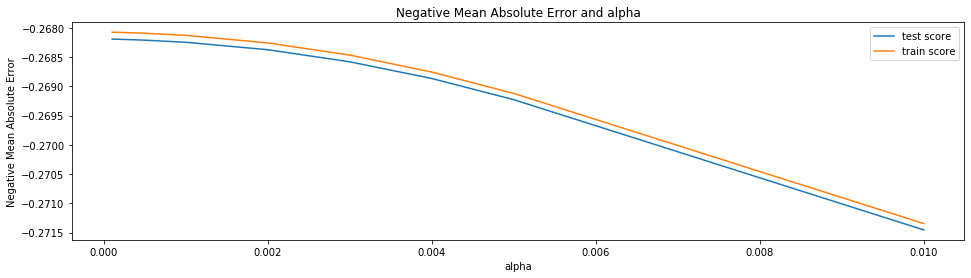

In [158]:
# plotting mean test and train scoes with alpha 
plt.figure(figsize=(16,4))

plt.plot(lasso_cv_results["param_alpha"], lasso_cv_results["mean_test_score"])
plt.plot(lasso_cv_results["param_alpha"], lasso_cv_results["mean_train_score"])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['test score', 'train score'], loc='upper right')

In [159]:
# The best estimator for lambda

lasso_model_cv.best_estimator_

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

- Lambda is 0.0001

In [160]:
alpha = 0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_sm, y_train) 

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [161]:
X_train_sm.columns

Index(['const', 'roam_og_mou_8', 'total_og_mou_8', 'total_ic_mou_8',
       'total_rech_num_8', 'last_day_rch_amt_8', 'vol_3g_mb_8', 'sachet_2g_8',
       'fb_user_8', 'sep_vbc_3g', 'avg_arpu_67', 'avg_total_ic_mou_67',
       'avg_av_rech_amt_data_67', 'avg_monthly_2g_67', 'aon_mon'],
      dtype='object')

In [162]:
# Dropping 'const' from X_train_sm
X_train_new = X_train_sm.drop('const',axis=1)
X_train_new.shape

(41590, 14)

In [163]:
# Creating new test df with the columns
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

X_test_new.shape

(13864, 15)

In [164]:
#lets predict the R-squared value of test and train data
y_train_pred = lasso.predict(X_train_sm)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

y_test_pred = lasso.predict(X_test_new)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.5211673320558714
0.5224605985067243


In [165]:
#The mean squared error
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, lasso.predict(X_test_new))

0.11938464913201147

### Metrics beyond simply accuracy


In [166]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [167]:
# Let's see the sensitivity(Recall) and Specificity(Precision) of our logistic regression model
print("Sensitivity :", TP / float(TP+FN))
print("Specificity :", TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Positive Rate :", FP/ float(TN+FP))

# positive predictive value 
print("Positive Predictive Value :", TP / float(TP+FP))

# Negative predictive value
print("Negative Predictive Value :",TN / float(TN+ FN))

Sensitivity : 0.8465794284614645
Specificity : 0.8623341665064411
False Positive Rate : 0.13766583349355893
Positive Predictive Value : 0.8600263916719613
Negative Predictive Value : 0.8490699985801505


### Plotting the ROC Curve

In [168]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [169]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

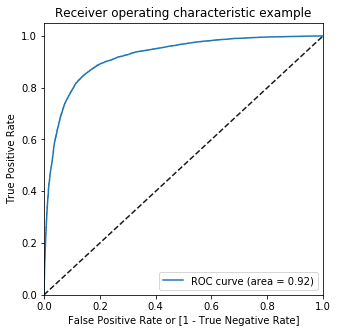

In [170]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

- Above ROC has the curve closer to the top-left corner indicate a better performance. <b> ROC value is .92 which signifies that our model is very good<b>

### Finding Optimal Cutoff Point

In [171]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.234791,20910,0,1,1,1,0,0,0,0,0,0,0
1,0,0.692444,8552,1,1,1,1,1,1,1,1,0,0,0
2,1,0.784789,34351,1,1,1,1,1,1,1,1,1,0,0
3,0,0.016477,5126,0,1,0,0,0,0,0,0,0,0,0
4,0,0.092967,4551,0,1,0,0,0,0,0,0,0,0,0


In [172]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0  0.0   0.499784  1.000000  0.000000
0.1  0.1   0.707021  0.978688  0.435589
0.2  0.2   0.785766  0.946021  0.625649
0.3  0.3   0.827771  0.916338  0.739281
0.4  0.4   0.848088  0.882902  0.813305
0.5  0.5   0.853162  0.844415  0.861902
0.6  0.6   0.846381  0.794573  0.898145
0.7  0.7   0.831786  0.737083  0.926408
0.8  0.8   0.798076  0.645194  0.950827
0.9  0.9   0.725727  0.473925  0.977312


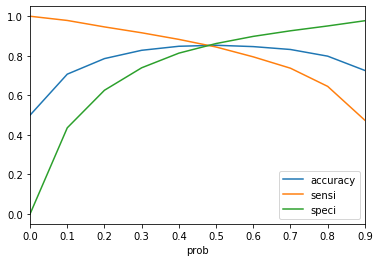

In [173]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [174]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.234791,20910,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.692444,8552,1,1,1,1,1,1,1,1,0,0,0,1
2,1,0.784789,34351,1,1,1,1,1,1,1,1,1,0,0,1
3,0,0.016477,5126,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.092967,4551,0,1,0,0,0,0,0,0,0,0,0,0


In [176]:
# Let's check the overall accuracy.
print("Accuracy Score: ",metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted))

Accuracy Score:  0.8531618177446502


In [177]:
# Confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion2)

[[17931  2873]
 [ 3234 17552]]


In [178]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [179]:
# Sensitivity or Recall
print('Recall: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity:', TN / float(TN+FP))

# Positive predictive value 
print ('Precision: ', TP / float(TP+FP))

# Negative predictive value
print ('Negative predictive value: ', TN / float(TN+ FN))

Recall:  0.8444145097661888
Specificity: 0.861901557392809
Precision:  0.8593390452876377
Negative predictive value:  0.8472005669737774


## Precision and Recall

In [180]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score, recall_score

In [181]:
Precision = precision_score(y_train_pred_final.Churn, y_train_pred_final.predicted)
print(Precision)

0.8593390452876377


In [182]:
Recall =recall_score(y_train_pred_final.Churn, y_train_pred_final.predicted)
print(Recall)

0.8444145097661888


In [183]:
F = 2 * ((Precision * Recall)/(Precision + Recall))
print("F1 Score: ", F)

F1 Score:  0.8518114095751135


<b>As per the Precision Score, it looks like the model was able to predict (85.9%) relevant data. This is a good model<b>

## Model Building 2- (Predictive Model)

### Logistic Regression with PCA

In [184]:
# The Dataset is initially Scaled and balanced. We will proceed by applying PCA to the model
print(os_smote_X.shape) #without Churn
print(os_smote_Y.shape) # with Churn

X_train,X_test,y_train,y_test = train_test_split(os_smote_X,os_smote_Y,test_size = .25 ,random_state = 111)

(55454, 63)
(55454, 1)


### Applying Principal Component Analysis

In [185]:
#Importing the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver = 'randomized', random_state = 42)
#picking randomly
pca.fit(X_train) # apply PCA on train data

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [186]:
X_train_pca = pca.fit_transform(X_train)
print(X_train_pca.shape)

X_test_pca = pca.transform(X_test)
print(X_test_pca.shape)

(41590, 63)
(13864, 63)


In [187]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
lgr_pca = LogisticRegression()
lgr_pca.fit(X_train_pca, y_train)

# make the predictions
y_pred = lgr_pca.predict(X_test_pca)

# convert prediction array into a dataframe
y_pred_df = pd.DataFrame(y_pred)

In [188]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Confusion Matrix: \n", confusion_matrix(y_test,y_pred))
print("Accuracy of the logistic regression model with PCA: ",accuracy_score(y_test,y_pred))

Confusion Matrix: 
 [[5994  929]
 [ 982 5959]]
Accuracy of the logistic regression model with PCA:  0.8621609924985574


In [189]:
# PCA components created 
print(pca.components_)
col = list(X.columns)
df_pca = pd.DataFrame({'PC-1':pca.components_[0],'PC-2':pca.components_[1], 'PC-3':pca.components_[2],'Feature':col})
df_pca.head(10)

[[ 1.97642541e-02 -9.32317654e-02 -6.38483323e-02 ...  7.12633537e-02
   2.63597115e-01  3.08806513e-02]
 [ 3.30448038e-01  1.50228298e-01  2.10824143e-01 ... -1.67823492e-02
  -2.26755898e-02  8.63976197e-02]
 [ 3.55862779e-02 -5.24085564e-02 -9.00041308e-02 ...  4.68179516e-02
  -3.16152973e-02 -4.09975720e-02]
 ...
 [ 4.87815366e-03 -1.72916433e-03 -1.89594471e-03 ... -7.03357577e-03
   3.58605485e-01  6.18890432e-04]
 [-2.48797811e-04 -9.75558889e-04 -2.89554402e-04 ... -3.05949670e-03
  -6.56779897e-01 -5.58176628e-03]
 [-1.00268199e-03 -1.59012841e-03 -1.25456363e-03 ...  4.69150370e-03
   2.58873938e-02 -1.08196258e-03]]


,PC-1,PC-2,PC-3,Feature
0,0.019764,0.330448,0.035586,arpu_8
1,-0.093232,0.150228,-0.052409,onnet_mou_8
2,-0.063848,0.210824,-0.090004,offnet_mou_8
3,-0.108255,-0.149887,-0.357501,roam_ic_mou_8
4,-0.123608,-0.142784,-0.338394,roam_og_mou_8
5,0.019958,0.197773,-0.115231,loc_og_mou_8
6,-0.117069,0.119666,0.007174,std_og_mou_8
7,-0.004103,0.061226,-0.014081,spl_og_mou_8
8,-0.076341,0.275263,0.077149,total_og_mou_8
9,0.046984,0.177092,-0.121148,loc_ic_mou_8


In [190]:
# Variance Ratio-  explained by the first principal component

pca.explained_variance_ratio_

array([1.83689389e-01, 1.61481859e-01, 7.90325598e-02, 6.17346107e-02,
       5.77146297e-02, 4.20715038e-02, 3.37898176e-02, 2.63650462e-02,
       2.47967164e-02, 2.45120493e-02, 2.19462286e-02, 1.97278380e-02,
       1.89392154e-02, 1.82479218e-02, 1.69965246e-02, 1.61664928e-02,
       1.45126028e-02, 1.28398962e-02, 1.05289686e-02, 1.03381968e-02,
       9.72255770e-03, 9.31639674e-03, 9.18168714e-03, 8.96136159e-03,
       8.17447812e-03, 7.50021211e-03, 6.86495085e-03, 6.34679678e-03,
       6.13692368e-03, 5.73522585e-03, 5.18267048e-03, 4.77451093e-03,
       4.63398524e-03, 4.54585015e-03, 4.12672728e-03, 3.95019317e-03,
       3.57956149e-03, 3.14403572e-03, 3.01562041e-03, 2.91199457e-03,
       2.77370092e-03, 2.51942148e-03, 2.14785754e-03, 2.12293022e-03,
       1.99395663e-03, 1.84299318e-03, 1.75692555e-03, 1.64074755e-03,
       1.43396477e-03, 1.28938452e-03, 1.07802076e-03, 1.01582411e-03,
       9.31120283e-04, 7.94541024e-04, 7.68184737e-04, 6.38289346e-04,
      

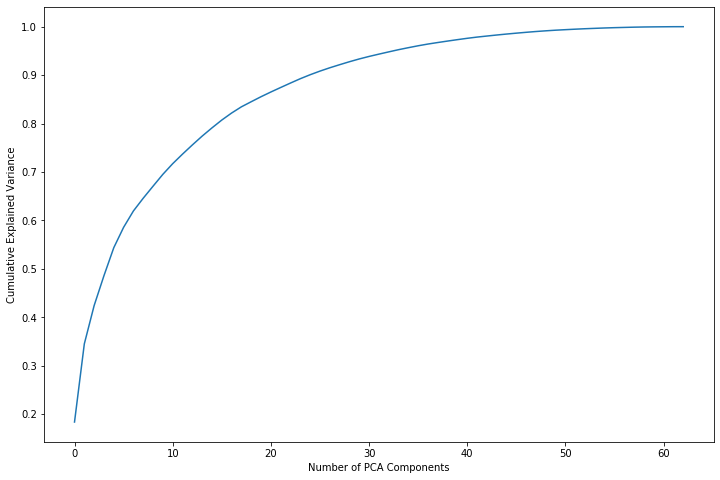

In [191]:
# scree plot to check the variance explained by different PCAs
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of PCA Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

- From the above Scree plot it is seen that, more than 90% variance is explained by nearly more than 33 principal components. Hence, we will use these components for Clustering

In [192]:
#Calculating the number of components
cnt = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print("{} number of columns explains more than 90% of the variance".format((cnt > 90).sum()))

39 number of columns explains more than 90% of the variance


### Running PCA with the 39 components

In [193]:
# dimenstionality reduction
pca_final = PCA(n_components = 39)

X_train_pca = pca_final.fit_transform(X_train)
print(X_train_pca.shape)

X_test_pca = pca_final.transform(X_test)
print(X_test_pca.shape)

(41590, 39)
(13864, 39)


In [194]:
# Let's run the model using the selected 39 variables
lgr_pca1 = LogisticRegression()
lgr_pca1.fit(X_train_pca, y_train)

# Predicted probabilities
y_pred_39 = lgr_pca1.predict(X_test_pca)

# Converting y_pred to a dataframe which is an array
df_y_pred = pd.DataFrame(y_pred_39)

print("Confusion Matrix: \n", confusion_matrix(y_test,y_pred_39))
print("Accuracy with 39 PCAs: ", accuracy_score(y_test,y_pred_39))

Confusion Matrix: 
 [[5952  971]
 [1043 5898]]
Accuracy with 39 PCAs:  0.854731679169071


### Hyperparameter - Grid Search

In [195]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# making skeletal model
logistic_regression = LogisticRegression()

# Set of parameters we want to try for out Model
parameters = { 'C' : [0.004, 0.005, 0.01,1.1,1.25,1.5]}

#Running the Model with above chosen parameter
grid_search = GridSearchCV(estimator = logistic_regression, param_grid = parameters , scoring = 'accuracy', cv = 3, n_jobs = -1 , verbose = 2)
grid_scores = grid_search.fit(X_train_pca , y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   14.6s finished


In [196]:
print(grid_search.best_score_)
print(grid_search.best_params_)

0.8529454893534937
{'C': 1.5}


<b>As the best Hyper parameter turns out to be C = 1.5, the final model should be made with the above mentioned Hyper-parameters<b>

In [197]:
# Making the Final Classification model.
logistic_regression = LogisticRegression( C = 1.5)
#tick =datetime.datetime.now()
logistic_regression.fit(X_train_pca, y_train)
#tock=datetime.datetime.now()
#lr_train_time = tock - tick
#print("Time taken for training a Logistic Regression model = " + str(lr_train_time))

LogisticRegression(C=1.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Predicting values on training set

In [198]:
#tick=datetime.datetime.now()
lr_train_predict=logistic_regression.predict(X_train_pca)
#tock=datetime.datetime.now()
#lr_pred_train_time = tock - tick
#print('Time taken to predict the data points in the Test set is : ' + str(lr_pred_train_time))

### Confusion Matrix (Training Set)

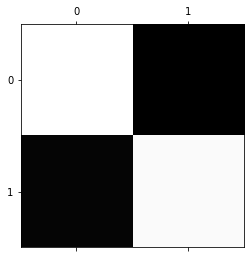

In [199]:
#Making the confusion Matrix
from sklearn.metrics import confusion_matrix
cf= confusion_matrix(y_train, lr_train_predict)

# Visualizing the Confusion Matrix`
plt.matshow(cf , cmap = plt.cm.gray, )
plt.show()

- Here the rows represent the ACTUAL CLASS and the columns represent PREDICTED CLASS.
- The WHITE BOX shows the high values that most of the class were predicted correctly.

### Accuracy on Training Set

In [200]:
k = logistic_regression.score(X_train_pca, y_train)
print(' Accuracy on the training is : ' + str(k))

 Accuracy on the training is : 0.8538831449867756


<b>Accuracy on the training set came out to be  85.38 % which is  good indeed<b>

### Classification report of prediction on training set

In [201]:
import sklearn.metrics as skm
print(skm.classification_report( y_train , lr_train_predict ))

              precision    recall  f1-score   support

           0       0.85      0.86      0.86     20804
           1       0.86      0.85      0.85     20786

    accuracy                           0.85     41590
   macro avg       0.85      0.85      0.85     41590
weighted avg       0.85      0.85      0.85     41590



<b> The F1 score is 0.85, which is reasonably good<b>

<b>Conclusions from the above model:<b>

Model has 85.38% accuracy and  39 features can explain 90% variance in the dataset.

In [283]:
logistic_regression?

In [285]:
# extract the numerical values of feature importance from the grid search
importances = logistic_regression.coef_

#create a feature list from the original dataset (list of columns)
# What are this numbers? Let's get back to the columns of the original dataset
feature_list = list(X.columns)

#create a list of tuples
feature_importance= sorted(zip(importances, feature_list), reverse=True)

#create two lists from the previous list of tuples
df = pd.DataFrame(feature_importance, columns=['Importance', 'Feature'])
importance= list(df['Importance'])
feature= list(df['Feature'])

#see df
#print(df.head())
df.sort_values(["Importance"],ascending=False, inplace=True)

#top 10 features
imp_feature_df = df
imp_feature_df

,Importance,Feature
0,"[-0.3948516018927944, -0.6276128141730005, -0.3339202806094764, 0.07273122618858338, 0.22132748335240834, 0.4741140341238914, -0.05356977491959924, -0.004608917895154845, -0.2135744430821444, 0.12474092458151667, -0.07021873327355983, -0.08761943750820592, 0.011127700080193178, -0.09930039554740518, 0.14947639367983018, 0.2616068405353025, -0.05083804236003445, -0.35380785042899465, -0.0749746956892044, -0.15407497842324328, 0.47304139484213775, -0.40307768518162473, -0.32066653602516293, -1.714865372632807, -0.19431070656099997, -0.028349660656676826, -0.008040485190843025, -0.15638045050015464, -0.4129425245287464, -0.46718013390712493, -0.06529526221555719, 0.2302782903874452, 0.015145158261526223, 0.14127823216704227, -0.16511968896128798, -0.19260084736179978, 0.042233270287067734, 0.22472361558863133, -0.06066208312483256]",arpu_8


## Model Building 3- (Predictive Model)
### Decision Tree with PCA

In [202]:
# The Dataset is initially Scaled and balanced. We will proceed by applying PCA to the model
print(os_smote_X.shape) #without Churn
print(os_smote_Y.shape) # with Churn

X_train,X_test,y_train,y_test = train_test_split(os_smote_X,os_smote_Y,test_size = .25 ,random_state = 111)

(55454, 63)
(55454, 1)


### Applying Principal Component Analysis

In [203]:
#Importing the PCA module
from sklearn.decomposition import PCA
dt_pca = PCA(svd_solver = 'randomized', random_state = 42)

dt_pca.fit(X_train) # apply PCA on train data

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [204]:
X_train_dt_pca = dt_pca.fit_transform(X_train)
print(X_train_dt_pca.shape)

X_test_dt_pca = pca.transform(X_test)
print(X_test_dt_pca.shape)

(41590, 63)
(13864, 63)


In [205]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_train_dt_pca, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [206]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_default = dt_default.predict(X_test_dt_pca)

# Printing classification report
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83      6923
           1       0.84      0.82      0.83      6941

    accuracy                           0.83     13864
   macro avg       0.83      0.83      0.83     13864
weighted avg       0.83      0.83      0.83     13864



In [208]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred_default))
print("Accuracy Score: ", accuracy_score(y_test,y_pred_default))

[[5819 1104]
 [1277 5664]]
Accuracy Score:  0.828260242354299


In [209]:
# PCA components created 
print(pca.components_)
col = list(X.columns)
df_pca = pd.DataFrame({'PC-1':pca.components_[0],'PC-2':pca.components_[1], 'PC-3':pca.components_[2],'Feature':col})
df_pca.head(10)

[[ 1.97642541e-02 -9.32317654e-02 -6.38483323e-02 ...  7.12633537e-02
   2.63597115e-01  3.08806513e-02]
 [ 3.30448038e-01  1.50228298e-01  2.10824143e-01 ... -1.67823492e-02
  -2.26755898e-02  8.63976197e-02]
 [ 3.55862779e-02 -5.24085564e-02 -9.00041308e-02 ...  4.68179516e-02
  -3.16152973e-02 -4.09975720e-02]
 ...
 [ 4.87815366e-03 -1.72916433e-03 -1.89594471e-03 ... -7.03357577e-03
   3.58605485e-01  6.18890432e-04]
 [-2.48797811e-04 -9.75558889e-04 -2.89554402e-04 ... -3.05949670e-03
  -6.56779897e-01 -5.58176628e-03]
 [-1.00268199e-03 -1.59012841e-03 -1.25456363e-03 ...  4.69150370e-03
   2.58873938e-02 -1.08196258e-03]]


,PC-1,PC-2,PC-3,Feature
0,0.019764,0.330448,0.035586,arpu_8
1,-0.093232,0.150228,-0.052409,onnet_mou_8
2,-0.063848,0.210824,-0.090004,offnet_mou_8
3,-0.108255,-0.149887,-0.357501,roam_ic_mou_8
4,-0.123608,-0.142784,-0.338394,roam_og_mou_8
5,0.019958,0.197773,-0.115231,loc_og_mou_8
6,-0.117069,0.119666,0.007174,std_og_mou_8
7,-0.004103,0.061226,-0.014081,spl_og_mou_8
8,-0.076341,0.275263,0.077149,total_og_mou_8
9,0.046984,0.177092,-0.121148,loc_ic_mou_8


In [210]:
# Variance Ratio-  explained by the first principal component

pca.explained_variance_ratio_

array([1.83689389e-01, 1.61481859e-01, 7.90325598e-02, 6.17346107e-02,
       5.77146297e-02, 4.20715038e-02, 3.37898176e-02, 2.63650462e-02,
       2.47967164e-02, 2.45120493e-02, 2.19462286e-02, 1.97278380e-02,
       1.89392154e-02, 1.82479218e-02, 1.69965246e-02, 1.61664928e-02,
       1.45126028e-02, 1.28398962e-02, 1.05289686e-02, 1.03381968e-02,
       9.72255770e-03, 9.31639674e-03, 9.18168714e-03, 8.96136159e-03,
       8.17447812e-03, 7.50021211e-03, 6.86495085e-03, 6.34679678e-03,
       6.13692368e-03, 5.73522585e-03, 5.18267048e-03, 4.77451093e-03,
       4.63398524e-03, 4.54585015e-03, 4.12672728e-03, 3.95019317e-03,
       3.57956149e-03, 3.14403572e-03, 3.01562041e-03, 2.91199457e-03,
       2.77370092e-03, 2.51942148e-03, 2.14785754e-03, 2.12293022e-03,
       1.99395663e-03, 1.84299318e-03, 1.75692555e-03, 1.64074755e-03,
       1.43396477e-03, 1.28938452e-03, 1.07802076e-03, 1.01582411e-03,
       9.31120283e-04, 7.94541024e-04, 7.68184737e-04, 6.38289346e-04,
      

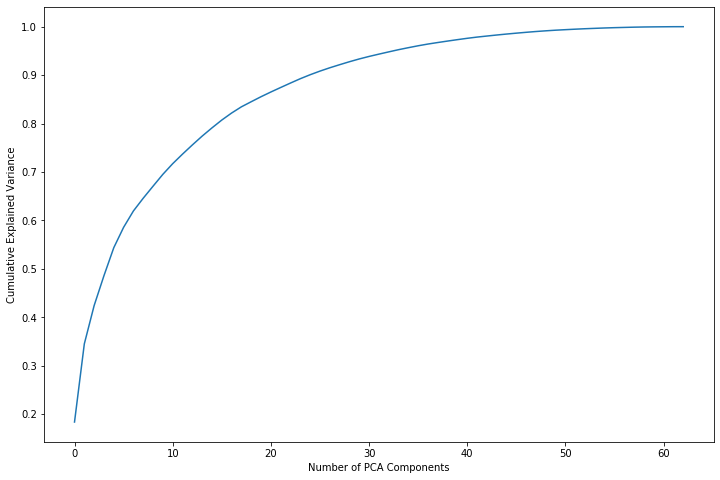

In [211]:
# scree plot to check the variance explained by different PCAs
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of PCA Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [212]:
cnt = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print("{} number of columns explains more than 90% of the variance".format((cnt > 90).sum()))

39 number of columns explains more than 90% of the variance


### Running PCA with the 39 components

In [213]:
# dimenstionality reduction- Running the PCA again on the data
pca_final = PCA(n_components = 39)
#variancr- 90% of data information difference btwn model and actual data 
X_train_dt_pca = pca_final.fit_transform(X_train)
print(X_train_dt_pca.shape)

X_test_dt_pca = pca_final.transform(X_test)
print(X_test_dt_pca.shape)

(41590, 39)
(13864, 39)


In [215]:
# Let's run model using these 39 components
dt_pca1 = DecisionTreeClassifier(max_depth=5)
dt_pca1.fit(X_train_dt_pca, y_train)

# Making predictions
y_pred_dt_39 = dt_pca1.predict(X_test_dt_pca)

# Printing classification report
print(classification_report(y_test, y_pred_dt_39))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83      6923
           1       0.84      0.81      0.83      6941

    accuracy                           0.83     13864
   macro avg       0.83      0.83      0.83     13864
weighted avg       0.83      0.83      0.83     13864



In [216]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred_dt_39))
print("Accuracy Score: ", accuracy_score(y_test,y_pred_dt_39))

[[5828 1095]
 [1291 5650]]
Accuracy Score:  0.8278995960761685


### Plotting the Decision Tree

In [217]:
# # Importing required packages for visualization
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

# # Putting features
features = list(X.columns) #original dataframe X
features

['arpu_8',
 'onnet_mou_8',
 'offnet_mou_8',
 'roam_ic_mou_8',
 'roam_og_mou_8',
 'loc_og_mou_8',
 'std_og_mou_8',
 'spl_og_mou_8',
 'total_og_mou_8',
 'loc_ic_mou_8',
 'std_ic_mou_8',
 'total_ic_mou_8',
 'spl_ic_mou_8',
 'isd_ic_mou_8',
 'ic_others_8',
 'total_rech_num_8',
 'total_rech_amt_8',
 'max_rech_amt_8',
 'last_day_rch_amt_8',
 'total_rech_data_8',
 'max_rech_data_8',
 'av_rech_amt_data_8',
 'vol_2g_mb_8',
 'vol_3g_mb_8',
 'monthly_2g_8',
 'sachet_2g_8',
 'monthly_3g_8',
 'sachet_3g_8',
 'fb_user_8',
 'sep_vbc_3g',
 'avg_rech_amt_67',
 'avg_arpu_67',
 'avg_onnet_mou_67',
 'avg_offnet_mou_67',
 'avg_roam_ic_mou_67',
 'avg_roam_og_mou_67',
 'avg_loc_og_mou_67',
 'avg_std_og_mou_67',
 'avg_spl_og_mou_67',
 'avg_og_others_67',
 'avg_total_og_mou_67',
 'avg_loc_ic_mou_67',
 'avg_std_ic_mou_67',
 'avg_total_ic_mou_67',
 'avg_spl_ic_mou_67',
 'avg_isd_ic_mou_67',
 'avg_ic_others_67',
 'avg_total_rech_num_67',
 'avg_total_rech_amt_67',
 'avg_max_rech_amt_67',
 'avg_last_day_rch_amt_67'

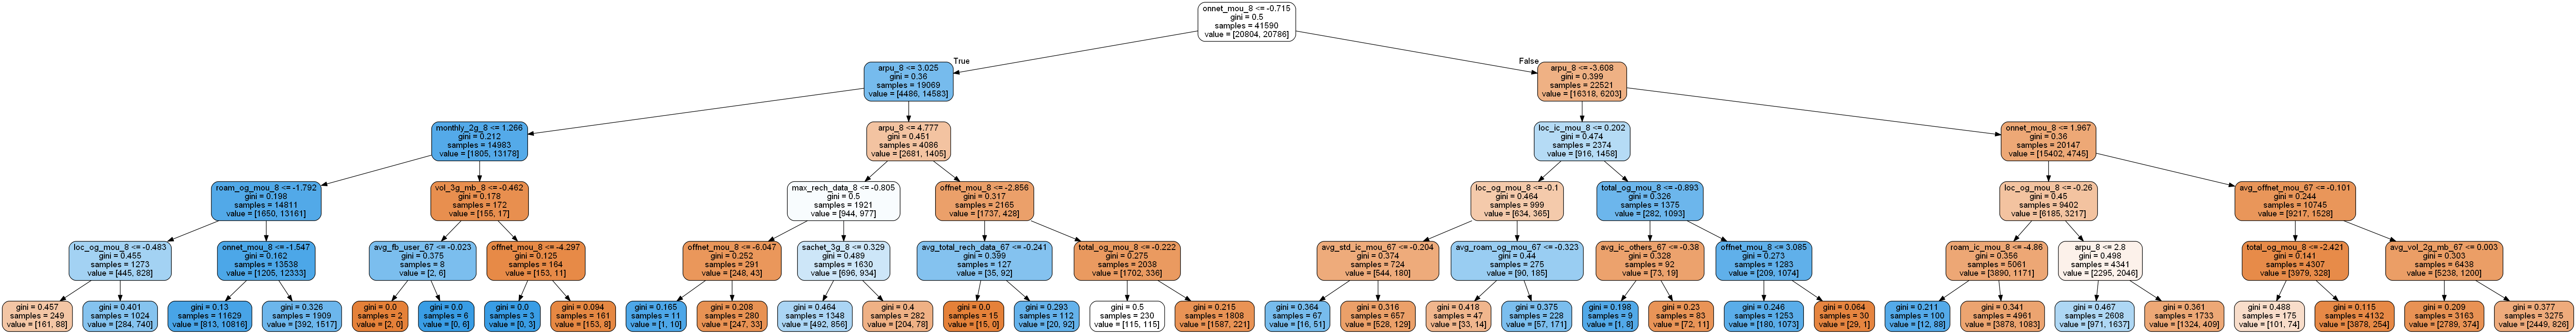

In [218]:
# # plotting tree with max_depth=3
dot_data = StringIO()  
export_graphviz(dt_default, out_file=dot_data, feature_names=features, filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### Hyperparameter Tuning

In [219]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_dt_pca,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  2.6min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['entropy', 'gini'],
                   

In [220]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.805135,0.034582,0.009373,0.007653,entropy,5,50,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 50, 'min_samples_split': 50}",0.818346,0.819788,0.828084,0.830729,0.820630,0.823515,0.004936,13
1,1.801455,0.020759,0.000000,0.000000,entropy,5,50,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 50, 'min_samples_split': 100}",0.818346,0.819788,0.828084,0.830729,0.820630,0.823515,0.004936,13
2,1.776037,0.008862,0.003126,0.006251,entropy,5,100,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 100, 'min_samples_split': 50}",0.818226,0.818947,0.828324,0.830849,0.820390,0.823347,0.005204,15
3,1.771752,0.015930,0.000000,0.000000,entropy,5,100,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 100, 'min_samples_split': 100}",0.818226,0.818947,0.828324,0.830849,0.820390,0.823347,0.005204,15
4,3.018537,0.036165,0.006251,0.007656,entropy,10,50,50,"{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 50}",0.845155,0.853090,0.846117,0.856215,0.844794,0.849074,0.004681,1
5,3.056036,0.080040,0.000000,0.000000,entropy,10,50,100,"{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 100}",0.845516,0.853090,0.845756,0.856215,0.844794,0.849074,0.004671,1
6,2.912160,0.150443,0.003125,0.006250,entropy,10,100,50,"{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 100, 'min_samples_split': 50}",0.838783,0.844314,0.841789,0.853811,0.841789,0.844097,0.005163,6
7,2.862441,0.056400,0.003126,0.006251,entropy,10,100,100,"{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 100, 'min_samples_split': 100}",0.838783,0.844314,0.841789,0.853811,0.841789,0.844097,0.005163,6
8,1.115546,0.007649,0.003126,0.006251,gini,5,50,50,"{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 50, 'min_samples_split': 50}",0.820991,0.824237,0.828444,0.825559,0.820269,0.823900,0.003005,9
9,1.118673,0.012502,0.003124,0.006248,gini,5,50,100,"{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 50, 'min_samples_split': 100}",0.820991,0.824237,0.828444,0.825559,0.820269,0.823900,0.003005,9


In [221]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.849074296705939
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


**Running the model with best parameters obtained from grid search.**

In [222]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=100)
clf_gini.fit(X_train_dt_pca, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [223]:
# accuracy score
clf_gini.score(X_test_dt_pca,y_test)

0.8532890940565493

In [225]:
# classification metrics
y_pred = clf_gini.predict(X_test_dt_pca)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85      6923
           1       0.86      0.84      0.85      6941

    accuracy                           0.85     13864
   macro avg       0.85      0.85      0.85     13864
weighted avg       0.85      0.85      0.85     13864



In [226]:
# confusion matrix
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[5987  936]
 [1098 5843]]
0.8532890940565493


<b>Conclusions from the above model:

Model has 85.32% accuracy and 39 features can explain 90% variance in the dataset.<b>

#### Important features by Decision Tree

In [281]:
# extract the numerical values of feature importance from the grid search
importances = clf_gini.feature_importances_

#create a feature list from the original dataset (list of columns)
# What are this numbers? Let's get back to the columns of the original dataset
feature_list = list(X.columns)

#create a list of tuples
feature_importance= sorted(zip(importances, feature_list), reverse=True)

#create two lists from the previous list of tuples
df = pd.DataFrame(feature_importance, columns=['Importance', 'Feature'])
importance= list(df['Importance'])
feature= list(df['Feature'])

#see df
#print(df.head())
df.sort_values(["Importance"],ascending=False, inplace=True)

#top 10 features
imp_feature_df = df.head(10)
imp_feature_df

,Importance,Feature
0,0.424412,onnet_mou_8
1,0.256705,arpu_8
2,0.055428,loc_og_mou_8
3,0.032058,loc_ic_mou_8
4,0.026367,offnet_mou_8
5,0.022523,roam_og_mou_8
6,0.019472,monthly_2g_8
7,0.015978,total_og_mou_8
8,0.012426,roam_ic_mou_8
9,0.011274,total_rech_num_8


## Model Building 4- (Predictive Model)
### Random Forest with PCA

In [227]:
# The Dataset is initially Scaled and balanced. We will proceed by applying PCA to the model
print(os_smote_X.shape) #without Churn
print(os_smote_Y.shape) # with Churn

X_train,X_test,y_train,y_test = train_test_split(os_smote_X,os_smote_Y,test_size = .25 ,random_state = 111)

(55454, 63)
(55454, 1)


### Applying Principal Component Analysis

In [228]:
#Importing the PCA module
from sklearn.decomposition import PCA
rf_pca = PCA(svd_solver = 'randomized', random_state = 42)

rf_pca.fit(X_train) # apply PCA on train data

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [229]:
X_train_rf_pca = rf_pca.fit_transform(X_train)
print(X_train_rf_pca.shape)

X_test_rf_pca = pca.transform(X_test)
print(X_test_rf_pca.shape)

(41590, 63)
(13864, 63)


In [230]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

# fit
rfc.fit(X_train_rf_pca,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [232]:
# Making predictions
predictions = rfc.predict(X_test_rf_pca)

# Let's check the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      6923
           1       0.96      0.97      0.96      6941

    accuracy                           0.96     13864
   macro avg       0.96      0.96      0.96     13864
weighted avg       0.96      0.96      0.96     13864



In [233]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))
print("Accuracy Score:", accuracy_score(y_test,predictions))

[[6626  297]
 [ 212 6729]]
Accuracy Score: 0.9632862088863243


- The Accuracy score is 96% which is very good. let's now look at the list of hyperparameters which we can tune to improve model performance.

### Hyperparameter Tuning
We can now find the optimal hyperparameters using GridSearchCV.

In [240]:
# Create a based model
rf = RandomForestClassifier(random_state=42)

# Create the parameter grid based on the results of random search 
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3,n_jobs = -1,verbose = 1)


In [241]:
# Fit the grid search to the data
grid_search.fit(X_train_rf_pca,y_train)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 11.7min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed: 72.8min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [242]:
# optimal accuracy score and hyperparameters
print('Accuracy is',grid_search.best_score_,'using',grid_search.best_params_)

Accuracy is 0.876508859253406 using {'criterion': 'gini', 'max_depth': 8, 'max_features': 'log2', 'n_estimators': 500}


In [243]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(random_state=42, max_features='log2', n_estimators= 500, max_depth=8, criterion='gini')

In [244]:
# fit
rfc.fit(X_train_rf_pca,y_train)

# Make predictions
prediction_test = rfc.predict(X_test_rf_pca)

In [245]:
#Metrics Evaluation
print(classification_report(y_test,prediction_test))
print(confusion_matrix(y_test,prediction_test))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      6923
           1       0.90      0.84      0.87      6941

    accuracy                           0.88     13864
   macro avg       0.88      0.88      0.88     13864
weighted avg       0.88      0.88      0.88     13864

[[6309  614]
 [1114 5827]]


In [270]:
print("Accuracy Score for Random Forest Final Model: ",accuracy_score(y_test,prediction_test))

Accuracy Score for Random Forest Final Model:  0.8753606462781304



### <span style="color:blue">Of all the Models, Random Forest gives high accuracy score of 87.53%. </span>

Let us find the list of important features 

In [278]:
# extract the numerical values of feature importance from the grid search
importances = rfc.feature_importances_

#create a feature list from the original dataset (list of columns)
# What are this numbers? Let's get back to the columns of the original dataset
feature_list = list(X.columns)

#create a list of tuples
feature_importance= sorted(zip(importances, feature_list), reverse=True)

#create two lists from the previous list of tuples
df = pd.DataFrame(feature_importance, columns=['Importance', 'Feature'])
importance= list(df['Importance'])
feature= list(df['Feature'])

#see df
#print(df.head())
df.sort_values(["Importance"],ascending=False, inplace=True)

#top 10 features
imp_feature_df = df.head(10)
imp_feature_df

,Importance,Feature
0,0.247269,onnet_mou_8
1,0.111839,arpu_8
2,0.053856,loc_og_mou_8
3,0.047501,offnet_mou_8
4,0.047170,roam_og_mou_8
5,0.026941,sachet_3g_8
6,0.025822,monthly_2g_8
7,0.025229,max_rech_data_8
8,0.019746,fb_user_8
9,0.019311,sachet_2g_8


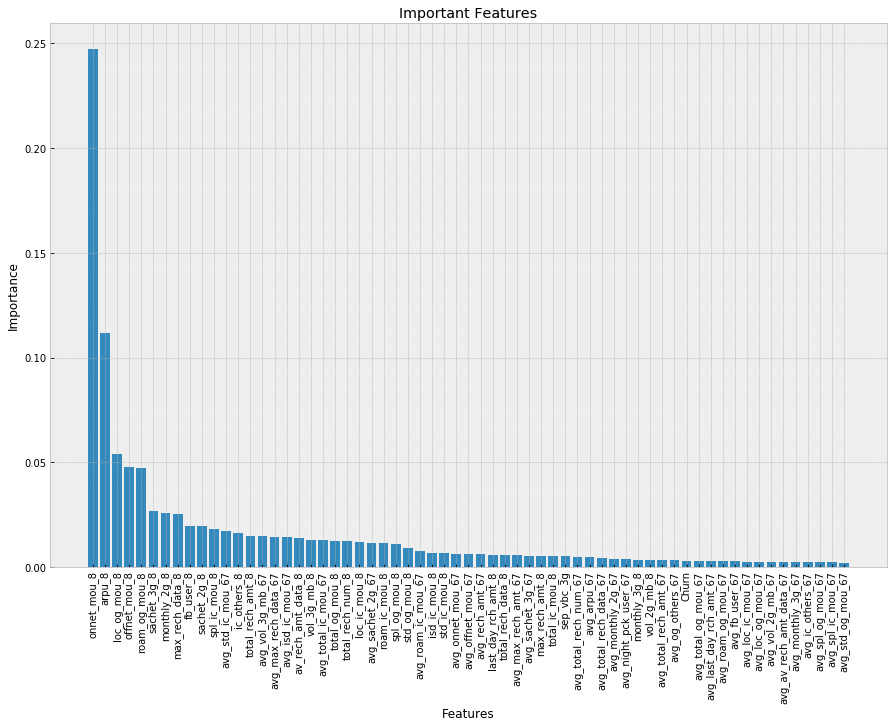

In [280]:
plt.style.use('bmh')
# list of x locations for plotting
x_values = list(range(len(feature_importance)))

# Make a bar chart
plt.figure(figsize=(15,10))
plt.bar(x_values, importance, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Features'); plt.title('Important Features');

### Conclusions from Random Forest and overall model

- The minutes of usage for all kinds of calls within the same operator network `(onner_mou_8)` for the month of 8, Average revenue per user `(arpu_8)` for the month of 8, local outgoing minutes of usage `loc_og_mou_8` for the month of 8 and roaming outgoing minutes of usage `roam_og_mou_8` are the most significant features that will help in predicting if a High Value Customer will Churn

- Overall Churn rate in the given data is about 7.63%. There are 92.36% Non-Churn Data.

Accuracy rate for all Models:
1. Accuracy Rate Logistic Regregression without PCA - 85.13%
2. Accuracy Rate Logistic Regregression with PCA - 85.38%
3. Accuracy Rate Decision Tree with PCA - 85.32%
4. Accuracy Rate Random Forest with PCA - 87.53%

Findings from the overall Model:
1. Roaming Calls, All calls made within the same network and outside the network and Revenue Per Customer are strong indicators of Churn.
2. Local Outgoing Calls for 8th Month and avg revenue in 8th Month are the most important columns to predict churn.
3. As per the Tenure graph shown initially, Customers with tenure more than 40 months are more likely to churn.
4. Random Forest produced the best prediction results followed by Decision Tree and Logistic regression.